# **TUIA - Aprendizaje Automático 1 - 2024**

---

**Materia:** Aprendizaje Automático I (IA41)

**Año académico:** 2024

**Período lectivo:** 2° cuatrimestre

**Integrantes:**
- Britos, Julián Francisco
- Menescaldi, Brisa
- Rodriguez y Barros, Francisco 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/franciscoryb1/AA1-TUIA-RodriguezYBarros-Menescaldi-Britos/blob/main/TP.ipynb)

# Librerías

Python 3.11.6

numpy   1.26.2

pandas  2.2.2

matplotlib  3.8.2

plotly  5.21.0

scikit-learn    1.5.0

seaborn 0.13.2


In [550]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    RidgeCV,
    ElasticNetCV,
    LassoCV,
    SGDRegressor,
    LogisticRegression
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
     mean_squared_error, 
     r2_score, 
     mean_absolute_error,
     classification_report, 
     confusion_matrix,
     ConfusionMatrixDisplay,
     balanced_accuracy_score, 
     log_loss,
     roc_curve, 
     roc_auc_score, 
     auc,
     accuracy_score,
     root_mean_squared_error
)

from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split

# Carga de datos

In [551]:
file_path = "house-prices-tp.csv"
df = pd.read_csv(file_path, sep=",", engine="python")

**Características de entrada en orden:**

1) CRIM: tasa de criminalidad per cápita por ciudad
2) ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
3) INDUS: proporción de acres de negocios no minoristas por ciudad
4) CHAS: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)
5) NOX: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]
6) RM: número promedio de habitaciones por vivienda
7) AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
8) DIS: distancias ponderadas a cinco centros de empleo de Boston
9) RAD: índice de accesibilidad a las autopistas radiales
10) TAX: tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]
11) PTRATIO: proporción alumno-maestro por ciudad
12) B: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
13) LSTAT: % de población de menor estatus socioeconómico

**Variable de salida (target):**

14) MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]


# Análisis estadístico descriptivo

## Exploración de los datos

Examinaremos los datos para un primer vistazo.

In [552]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.071510,0.000000,4.490000,0.0,0.449,6.121000,56.8,3.747600,3.000000,247.000000,18.500000,395.150000,8.440000,22.200000
1,0.082650,0.000000,13.920000,0.0,0.437,6.127000,18.4,5.502700,4.000000,289.000000,16.000000,396.900000,8.580000,23.900000
2,0.128160,12.500000,6.070000,0.0,0.409,5.885000,33.0,6.498000,4.000000,345.000000,18.900000,396.900000,8.790000,20.900000
3,0.088730,21.000000,5.640000,0.0,0.439,5.963000,45.7,6.814700,4.000000,243.000000,16.800000,395.560000,13.450000,19.700000
4,0.114320,0.000000,8.560000,0.0,0.520,6.781000,71.3,2.856100,5.000000,384.000000,20.900000,395.580000,7.670000,26.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.082440,30.000000,4.930000,0.0,0.428,6.481000,18.5,6.189900,6.000000,300.000000,16.600000,379.410000,6.360000,23.700000
552,0.475470,0.000000,9.900000,0.0,0.544,6.113000,58.8,4.001900,4.000000,304.000000,18.400000,396.230000,12.730000,21.000000
553,0.249800,0.000000,21.890000,0.0,0.624,5.857000,98.2,1.668600,4.000000,437.000000,21.200000,392.040000,21.320000,13.300000
554,32.504013,6.528591,8.937346,1.0,NaN,4.016588,NaN,5.243777,20.416908,197.236588,19.639059,6.267059,7.033962,23.028798


In [553]:
# INFORMACIÓN DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


Vemos cómo todas las variables son de tipo float, es decir, que no hay variables categóricas como tal. Además, también podemos observar cómo el dataset contiene 556 entradas y 14 columnas en total. Ninguna de las columnas tiene todos sus valores completos, ya que el conteo de valores no nulos (Non-Null Count) es menor que 556 para todas las columnas.
La columna con más valores faltantes parece ser "RAD" y "PTRATIO" con solo 528 valores no nulos, mientras que "INDUS" y "DIS" tienen la mayor cantidad de valores no nulos con 541.

In [554]:
# VALORES FALTANTES EN EL DATASET
df.isnull().sum()

CRIM       23
ZN         22
INDUS      15
CHAS       23
NOX        24
RM         21
AGE        24
DIS        15
RAD        28
TAX        18
PTRATIO    28
B          22
LSTAT      22
MEDV       21
dtype: int64

In [555]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,533.000000,534.000000,541.000000,533.000000,532.000000,535.000000,532.000000,541.000000,528.000000,538.000000,528.000000,534.000000,534.000000,535.000000
mean,5.845517,13.197175,11.218725,0.090056,0.560050,6.291839,67.632303,3.944102,9.699379,409.575089,18.429904,347.806040,13.028092,22.746809
std,13.828631,24.902981,6.942021,0.286531,0.119472,0.782403,28.461925,2.255689,8.684495,167.689379,2.194759,99.636208,7.579972,9.491452
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084470,0.000000,5.130000,0.000000,0.453000,5.875500,42.275000,2.112100,4.000000,279.000000,17.000000,369.530000,7.150000,16.750000
50%,0.315330,0.000000,9.690000,0.000000,0.538000,6.208000,76.500000,3.340107,5.000000,335.000000,19.000000,390.815000,11.465000,21.200000
75%,4.871410,20.000000,18.100000,0.000000,0.643986,6.638500,93.825000,5.400700,23.632660,666.000000,20.200000,395.890000,17.205000,26.300000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1. **Distribución de los datos**:
   - CRIM (tasa de criminalidad): Tiene una media de 5.85, pero un máximo de 88.98, lo que sugiere una distribución sesgada con algunos valores extremos altos.
   - ZN (proporción de terrenos residenciales): Tiene una mediana (50%) de 0, lo que indica que más de la mitad de las observaciones tienen valor 0.
   - CHAS (variable dummy para el río Charles): Es binaria (0 o 1), con una media de 0.09, lo que significa que aproximadamente el 9% de las propiedades están cerca del río.
   - NOX (concentración de óxidos nítricos): Varía entre 0.385 y 0.871, con una media de 0.56.
   - RM (número promedio de habitaciones): Varía entre 3.561 y 8.780, con una media de 6.29.
   - AGE (proporción de unidades ocupadas por sus propietarios construidas antes de 1940): Tiene una distribución amplia, desde 2.9% hasta 100%, con una media de 67.63%.
   - MEDV (valor mediano de las viviendas ocupadas por sus propietarios en $1000): Varía entre $5,000 y $50,000, con una media de $22,747.

2. **Posibles outliers**: 
   - CRIM tiene un rango muy amplio, con un máximo mucho mayor que el 75º percentil.
   - TAX (tasa de impuesto a la propiedad) también muestra una gran variabilidad.

3. **Escalas**: Las variables están en escalas muy diferentes. Por ejemplo, TAX tiene valores en los cientos, mientras que NOX está entre 0 y 1. Esto sugiere que puede ser necesaria una normalización o estandarización de los datos antes de aplicar ciertos modelos.


# Split de datos en Train y test

## Datos faltantes

In [556]:
# Contamos el número total de filas que tengan todos sus valores como nulos en train
df.isnull().all(axis=1).sum()

1

Vemos que en nuestro conjunto de datos existe una fila donde todos sus valores son nulos por lo que la eliminamos por completo.

In [557]:
df.dropna(how='all', inplace=True)

Verificamos que se haya borrado correctamente y que no queden filas que contengan todos sus valores nulos.

In [558]:
df.isnull().all(axis=1).sum()

0

## Separacion en X e Y

In [559]:
X = df.drop(columns=['MEDV'])
y = df["MEDV"]

## X_train, X_test, y_train, y_test

In [560]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualización de los datos

### Matriz de correlación

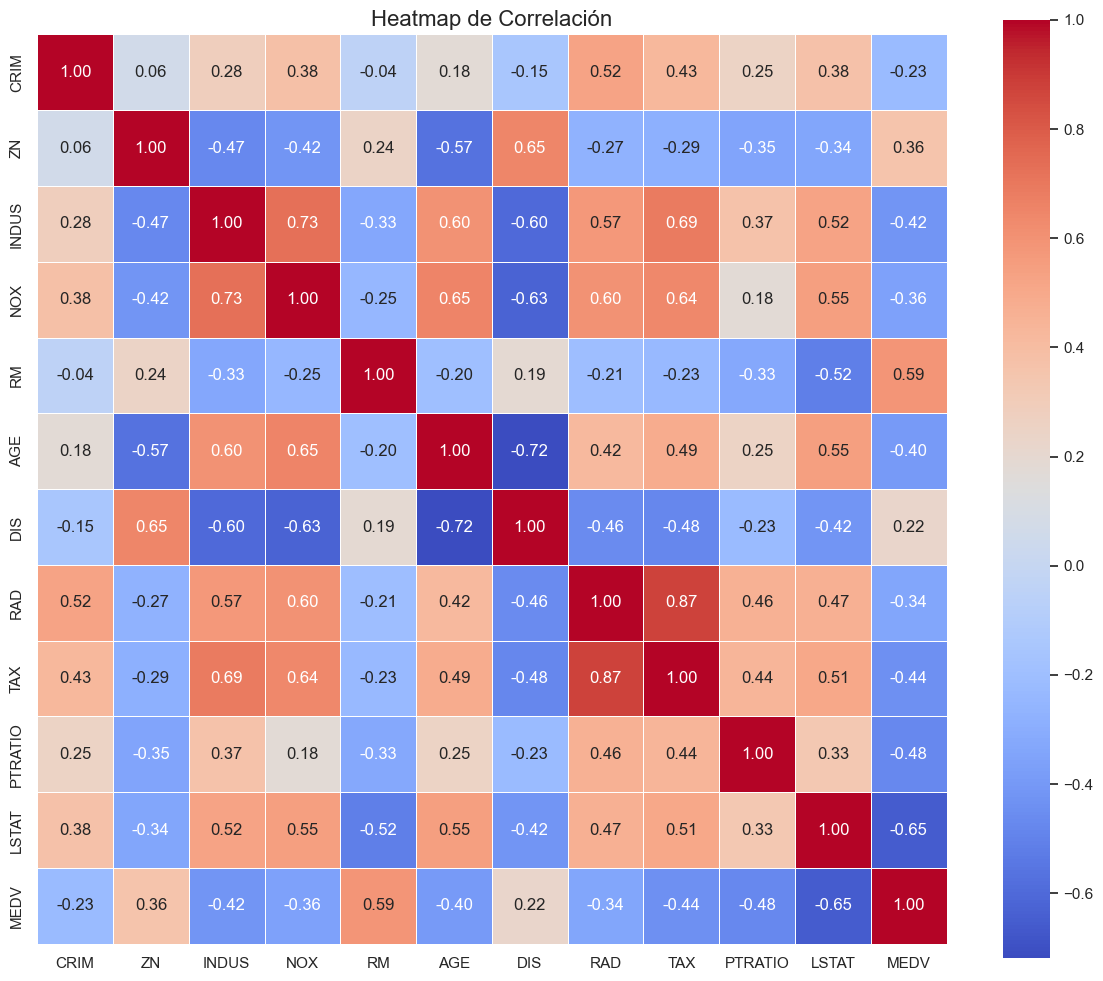

In [561]:
variables = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
df_subset = df[variables]

# Calcular la correlación entre las variables
correlation = df_subset.corr()

sns.set_theme()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True)
plt.title('Heatmap de Correlación', fontsize=16)
plt.tight_layout()
plt.show()

#### Análisis de correlación entre variables

##### Correlaciones altas identificadas (≥ 0.70):

1. **INDUS y NOX** (0.73):
   - Existe una fuerte correlación positiva entre la proporción de acres de negocios no minoristas por ciudad (INDUS) y la concentración de óxidos nítricos (NOX).
   - Esto sugiere que las áreas con mayor actividad industrial tienden a tener niveles más altos de contaminación por óxidos nítricos.

2. **AGE y DIS** (-0.72):
   - Hay una fuerte correlación negativa entre la proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE) y la distancia ponderada a los cinco centros de empleo de Boston (DIS).
   - Esto indica que las viviendas más antiguas tienden a estar más cerca de los centros de empleo, mientras que las más nuevas están generalmente más alejadas.

3. **RAD y TAX** (0.87):
   - Se observa una correlación positiva muy fuerte entre el índice de accesibilidad a las autopistas radiales (RAD) y la tasa de impuesto a la propiedad por $10,000 (TAX).
   - Esto sugiere que las áreas con mejor acceso a las autopistas tienden a tener tasas de impuestos más altas, posiblemente debido a una mayor demanda o desarrollo en estas zonas.

##### Implicaciones:

- La fuerte relación entre la actividad industrial y la contaminación del aire podría ser relevante para políticas de zonificación y regulaciones ambientales.
- La correlación entre la edad de las viviendas y su proximidad a los centros de empleo puede influir en estrategias de desarrollo urbano y planificación de transporte.
- La asociación entre el acceso a autopistas y las tasas de impuestos podría ser considerada en la planificación fiscal y el desarrollo de infraestructuras.

##### Nota:

Estas correlaciones no implican necesariamente causalidad, pero proporcionan insights valiosos sobre las relaciones entre diferentes características del mercado inmobiliario y factores urbanos en el área de Boston.

### **CRIM:** Tasa de criminalidad per cápita por ciudad

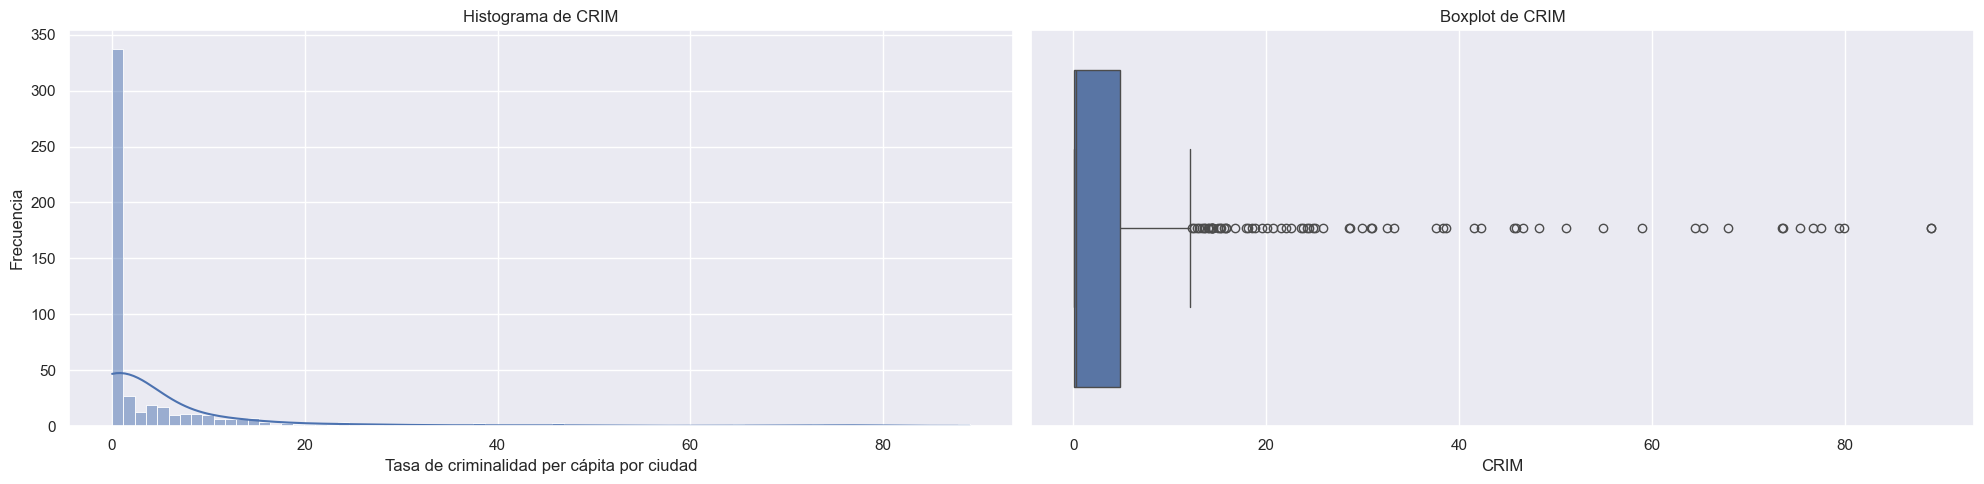

count    533.000000
mean       5.845517
std       13.828631
min        0.006320
25%        0.084470
50%        0.315330
75%        4.871410
max       88.976200
Name: CRIM, dtype: float64

In [562]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['CRIM'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de CRIM')
axs[0].set_xlabel('Tasa de criminalidad per cápita por ciudad')
axs[0].set_ylabel('Frecuencia')

# Cuartiles 
q1 = df['CRIM'].quantile(0.25)
q2 = df['CRIM'].quantile(0.5)
q3 = df['CRIM'].quantile(0.75)

# Boxplot
sns.boxplot(x=df['CRIM'], ax=axs[1])
axs[1].set_title('Boxplot de CRIM')
axs[1].set_xlabel('CRIM')

plt.tight_layout()
plt.show()

df['CRIM'].describe()

La mayoría de los valores de la tasa de criminalidad (CRIM) se concentran cerca de 0, lo que indica que la mayoría de las ciudades tienen una tasa de criminalidad baja.
A medida que los valores de CRIM aumentan, la frecuencia de aparición disminuye lo que sugiere que son pocas las ciudades con tasas de criminalidad muy altas.


Dado que CRIM está muy sesgada hacia la derecha y hay muchos valores extremos, optamos por la **mediana** para imputar valores faltantes.

In [563]:
# Calcular la mediana solo con los valores de train
mediana_crim_train = X_train['CRIM'].median()
X_train['CRIM'] = X_train['CRIM'].fillna(mediana_crim_train)

# Imputar en el conjunto de test usando la mediana calculada en train
X_test['CRIM'] = X_test['CRIM'].fillna(mediana_crim_train)

### **ZN:** Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados

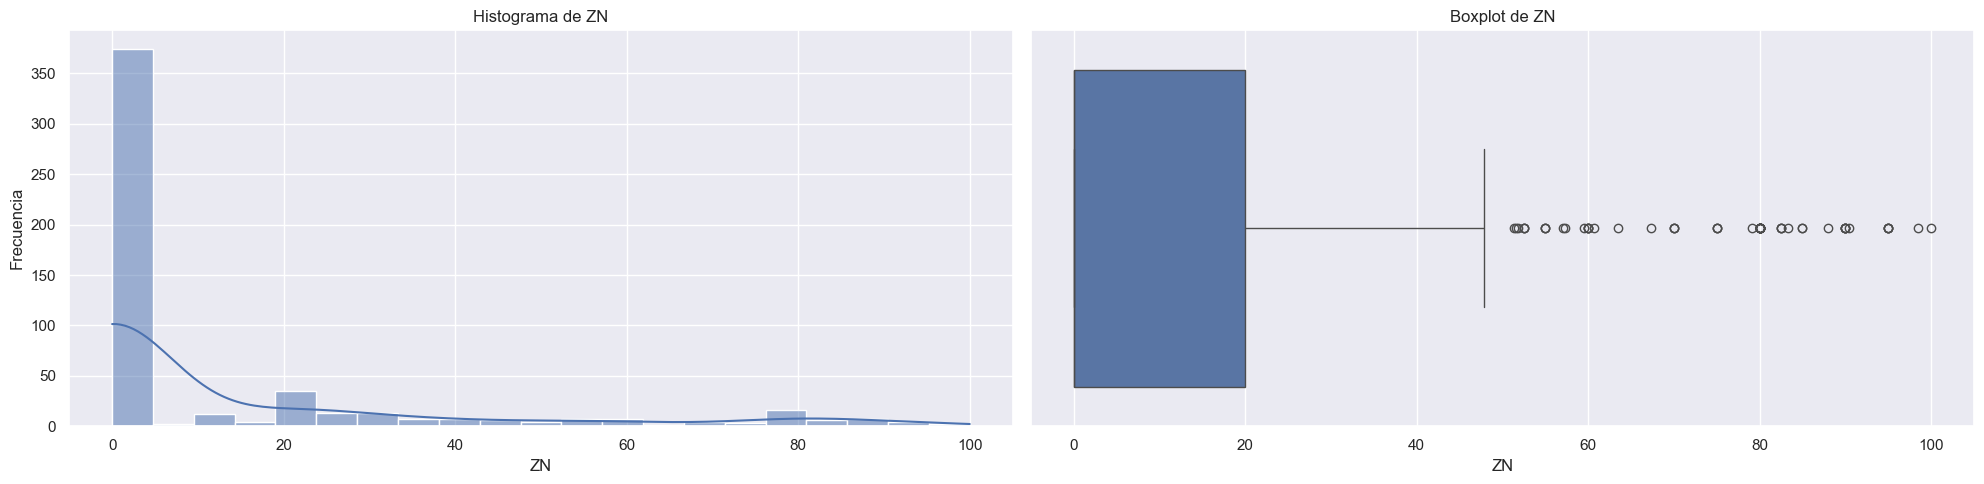

count    534.000000
mean      13.197175
std       24.902981
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max      100.000000
Name: ZN, dtype: float64

In [564]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['ZN'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de ZN')
axs[0].set_xlabel('ZN')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles 
q1 = df['ZN'].quantile(0.25)
q2 = df['ZN'].quantile(0.5)
q3 = df['ZN'].quantile(0.75)

# Boxplot
sns.boxplot(x=df['ZN'], ax=axs[1])
axs[1].set_title('Boxplot de ZN')
axs[1].set_xlabel('ZN')

plt.tight_layout()
plt.show()

df['ZN'].describe()

La mayoría de los valores de ZN están concentrados en 0, lo que nos dice que en muchos casos no hay terrenos residenciales zonificados para lotes grandes

El rango intercuartil muestra que el 75% de los datos están por debajo de 20, y solo un pequeño porcentaje tiene valores mayores

Dado que la mayoría de los valores de ZN son 0 y hay una fuerte presencia de outliers hacia valores altos, vamos a usar la **mediana** para imputar datos faltantes.

In [565]:
# Calcular la mediana solo con los valores de train
mediana_zn_train = X_train['ZN'].median()
X_train['ZN'] = X_train['ZN'].fillna(mediana_zn_train)

# Imputar en el conjunto de test usando la mediana calculada en train
X_test['ZN'] = X_test['ZN'].fillna(mediana_zn_train)

### **INDUS:** Proporción de acres de negocios no minoristas por ciudad y **NOX:** Concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]

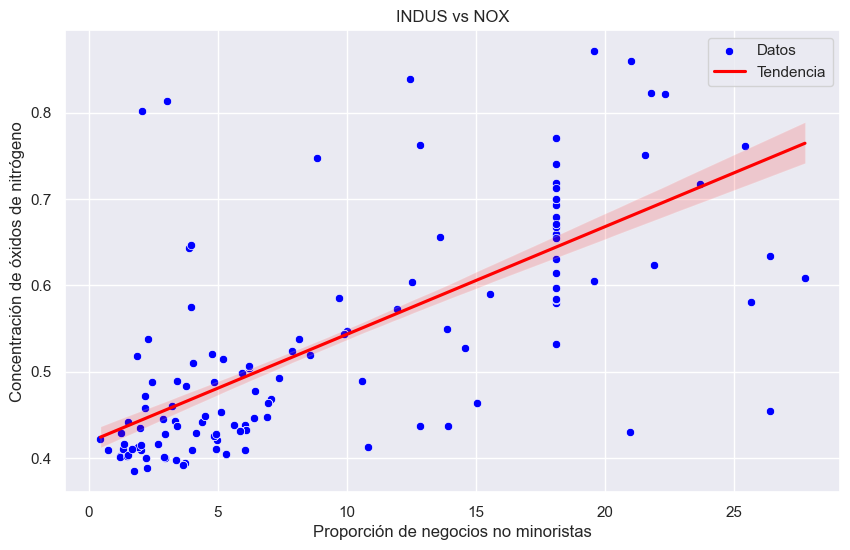

In [566]:
# Gráfico de dispersión 2D para INDUS vs NOX con línea de tendencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='INDUS', y='NOX', color='blue', label='Datos')
sns.regplot(data=df, x='INDUS', y='NOX', scatter=False, color='red', label='Tendencia')
plt.title('INDUS vs NOX')
plt.xlabel('Proporción de negocios no minoristas')
plt.ylabel('Concentración de óxidos de nitrógeno')
plt.legend()
plt.show()

Si bien la relación no es lineal perfecta, los puntos siguen una tendencia ascendente, con algunos valores dispersos hacia la derecha. De todas formas, la alta correlación entre ambas variables sugiere que en las zonas con una mayor proporción de terrenos industriales y no minoristas, la contaminación del aire también tiende a ser mayor.

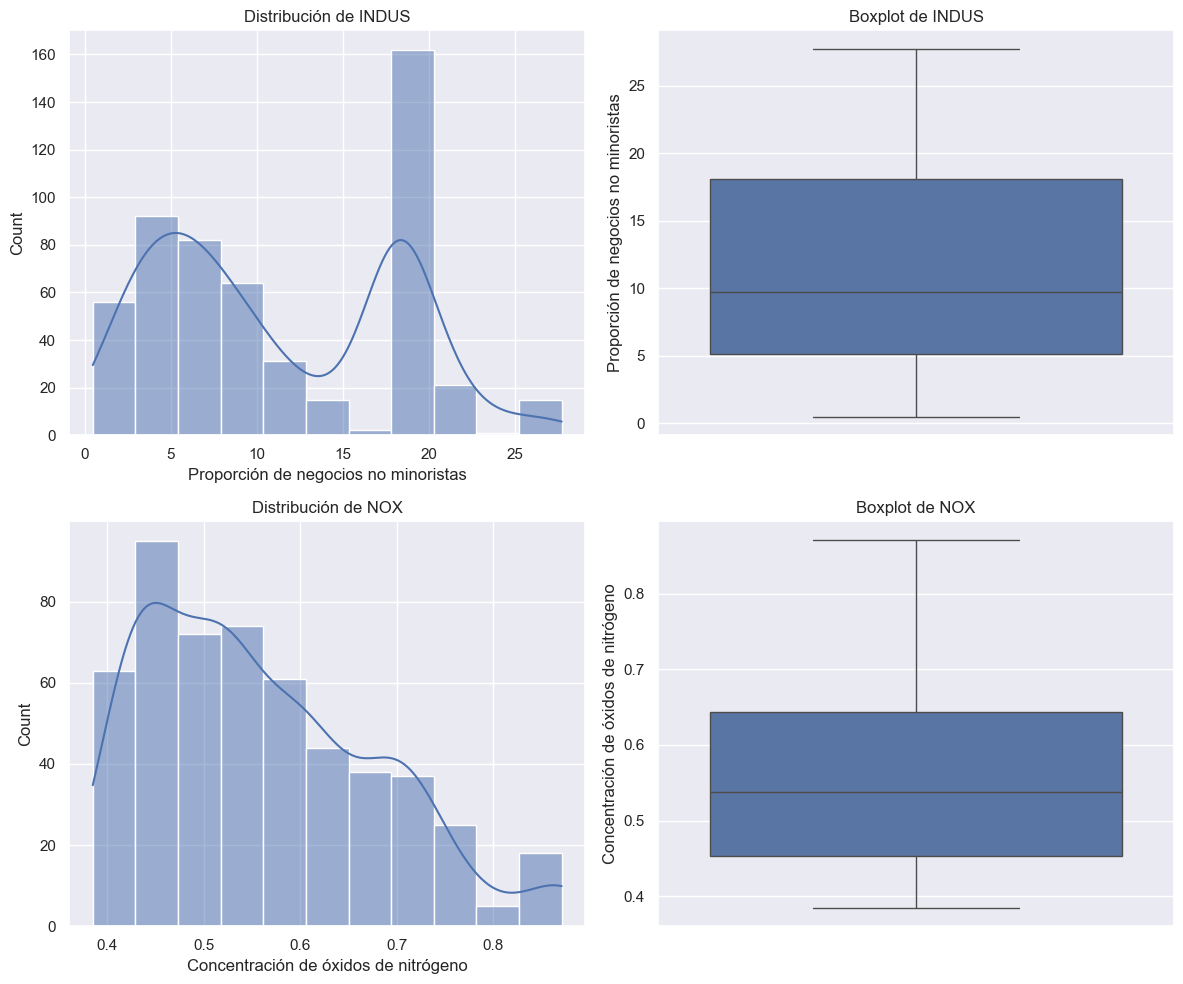

In [567]:
# Crear una figura con 2 filas y 2 columnas
plt.figure(figsize=(12, 10))

# Histograma de INDUS
plt.subplot(2, 2, 1)
sns.histplot(df['INDUS'], kde=True)
plt.title('Distribución de INDUS')
plt.xlabel('Proporción de negocios no minoristas')

# Boxplot de INDUS
plt.subplot(2, 2, 2)
sns.boxplot(y=df['INDUS'])
plt.title('Boxplot de INDUS')
plt.ylabel('Proporción de negocios no minoristas')

# Histograma de NOX
plt.subplot(2, 2, 3)
sns.histplot(df['NOX'], kde=True)
plt.title('Distribución de NOX')
plt.xlabel('Concentración de óxidos de nitrógeno')

# Boxplot de NOX
plt.subplot(2, 2, 4)
sns.boxplot(y=df['NOX'])
plt.title('Boxplot de NOX')
plt.ylabel('Concentración de óxidos de nitrógeno')

plt.tight_layout()
plt.show()

In [568]:
# 1. Gráfico de dispersión 3D
fig = px.scatter_3d(df, x='INDUS', y='NOX', z='MEDV', color='MEDV',
                    title='Relación entre INDUS, NOX contra MEDV',
                    labels={'MEDV': 'Valor mediano de las viviendas', 
                            'INDUS': 'Negocios no minoristas',
                            'NOX': 'Concentración de óxidos de nitrógeno'})
fig.show()

Dado que estas variables tienen una alta correlación, vamos a usar **KNN**, para aprovechar la información de una variable al imputar valores faltantes en la otra.

In [569]:
from sklearn.impute import KNNImputer
# Suponiendo que tus datos están en un DataFrame llamado X_train y X_test

# Definir el imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Imputación en las columnas INDUS y NOX directamente en X_train
X_train[['INDUS', 'NOX']] = imputer.fit_transform(X_train[['INDUS', 'NOX']])
X_test[['INDUS', 'NOX']] = imputer.transform(X_test[['INDUS', 'NOX']])


### **CHAS:** Variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)

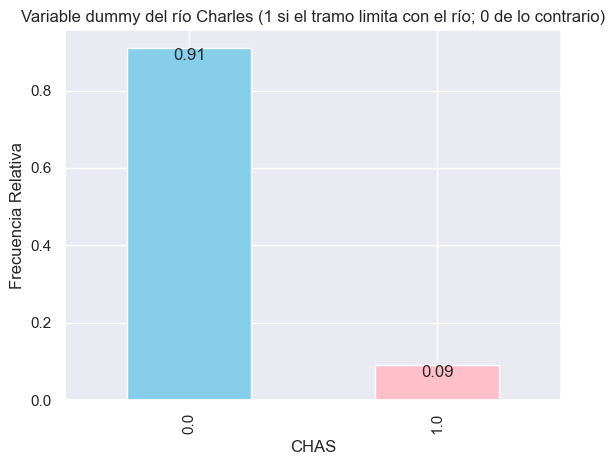

In [570]:
# GRÁFICO PARA VISUALIZAR EL BALANCE DE 'RainTomorrow'
rel_freq = df['CHAS'].value_counts(normalize=True)

grafico = rel_freq.plot(kind='bar', color=['skyblue', 'pink'])

plt.title('Variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)')
plt.ylabel('Frecuencia Relativa')

for index, value in enumerate(rel_freq):
    plt.text(index, value, f'{value:.2f}', ha='center', va='top')

plt.show()

In [571]:
moda_chas = X_train['CHAS'].mode()[0]

# Imputar los valores faltantes en X_train con la moda de forma segura (sin inplace)
X_train['CHAS'] = X_train['CHAS'].fillna(moda_chas)

# Imputar los valores faltantes en X_test con la misma moda calculada en X_train
X_test['CHAS'] = X_test['CHAS'].fillna(moda_chas)

### **RM:** Número promedio de habitaciones por vivienda

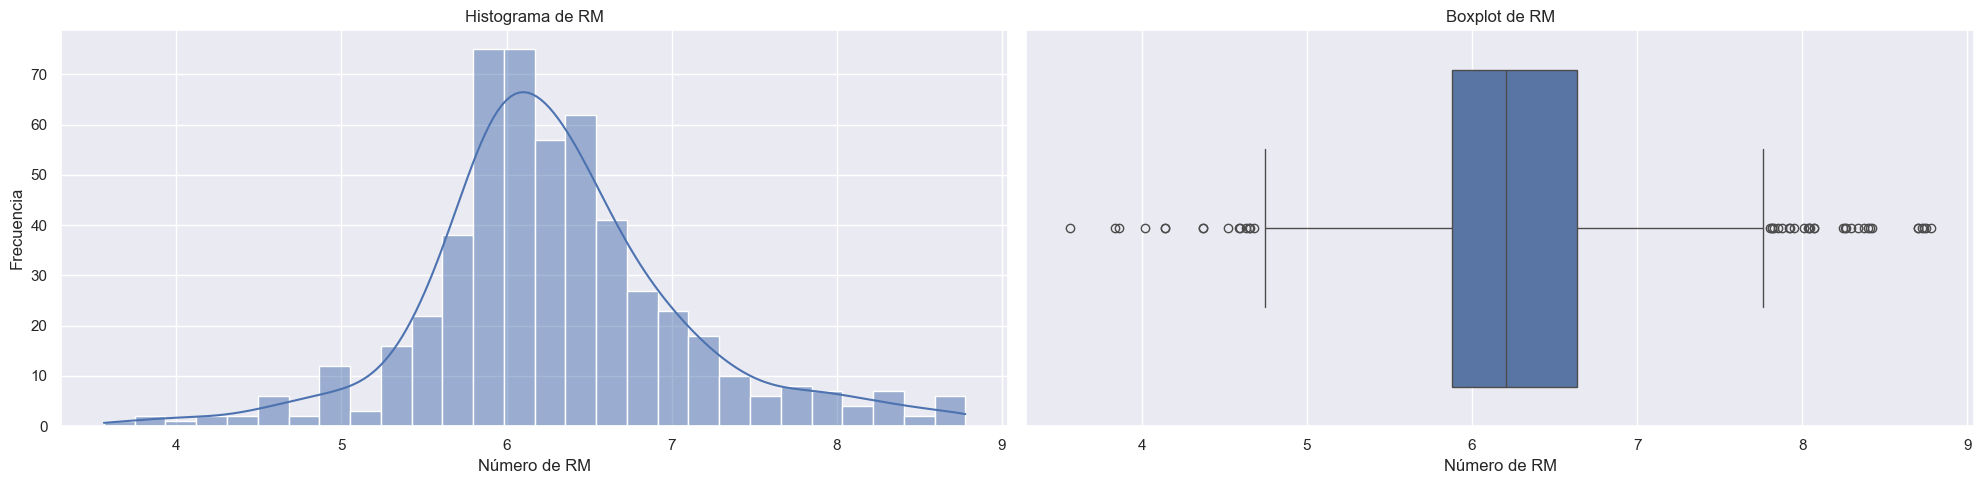

count    535.000000
mean       6.291839
std        0.782403
min        3.561000
25%        5.875500
50%        6.208000
75%        6.638500
max        8.780000
Name: RM, dtype: float64

In [572]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['RM'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de RM')
axs[0].set_xlabel('Número de RM')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles 
q1 = df['RM'].quantile(0.25)
q2 = df['RM'].quantile(0.5)
q3 = df['RM'].quantile(0.75)

# Boxplot
sns.boxplot(x=df['RM'], ax=axs[1])
axs[1].set_title('Boxplot de RM')
axs[1].set_xlabel('Número de RM')

plt.tight_layout()
plt.show()

df['RM'].describe()

Aunque hay algunos outliers en los extremos, la mayoría de los valores están concentrados cerca de la media. Esto indica que las viviendas suelen tener entre 6 y 7 habitaciones, con algunas excepciones de viviendas más grandes o más pequeñas.

Dado que la asimetría a la derecha es ligera y los outliers no son extremadamente influyentes, vamos a usar la **Media** como método de imputación.

In [573]:
media_rm = X_train['RM'].mean()

# Imputar los valores faltantes en X_train con la media
X_train['RM'] = X_train['RM'].fillna(media_rm)

# Imputar los valores faltantes en X_test con la misma media calculada en X_train
X_test['RM'] = X_test['RM'].fillna(media_rm)

### **AGE:** Proporción de unidades ocupadas por sus propietarios construidas antes de 1940 y **DIS:** Distancias ponderadas a cinco centros de empleo de Boston

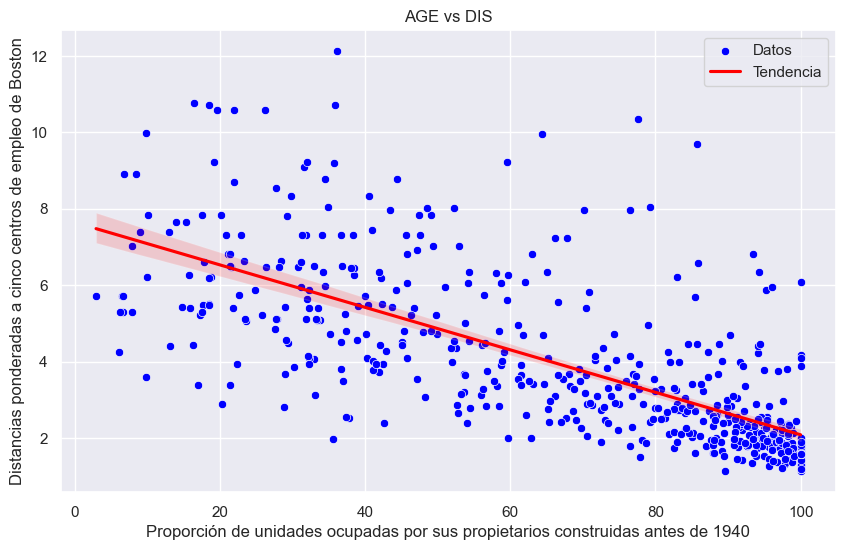

In [574]:
# Gráfico de dispersión 2D para AGE vs DIS con línea de tendencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AGE', y='DIS', color='blue', label='Datos')
sns.regplot(data=df, x='AGE', y='DIS', scatter=False, color='red', label='Tendencia')
plt.title('AGE vs DIS')
plt.xlabel('Proporción de unidades ocupadas por sus propietarios construidas antes de 1940')
plt.ylabel('Distancias ponderadas a cinco centros de empleo de Boston')
plt.legend()
plt.show()

La correlación negativa entre AGE y DIS (-0.72) nos hace entender que a medida que la proporción de viviendas antiguas aumenta, la distancia promedio a los centros de empleo disminuye, lo que para nosotros tiene sentido desde el punto de vista histórico, ya que las viviendas más antiguas tienden a estar ubicadas más cerca de los centros de empleo porque probablemente fueron desarrolladas primero.

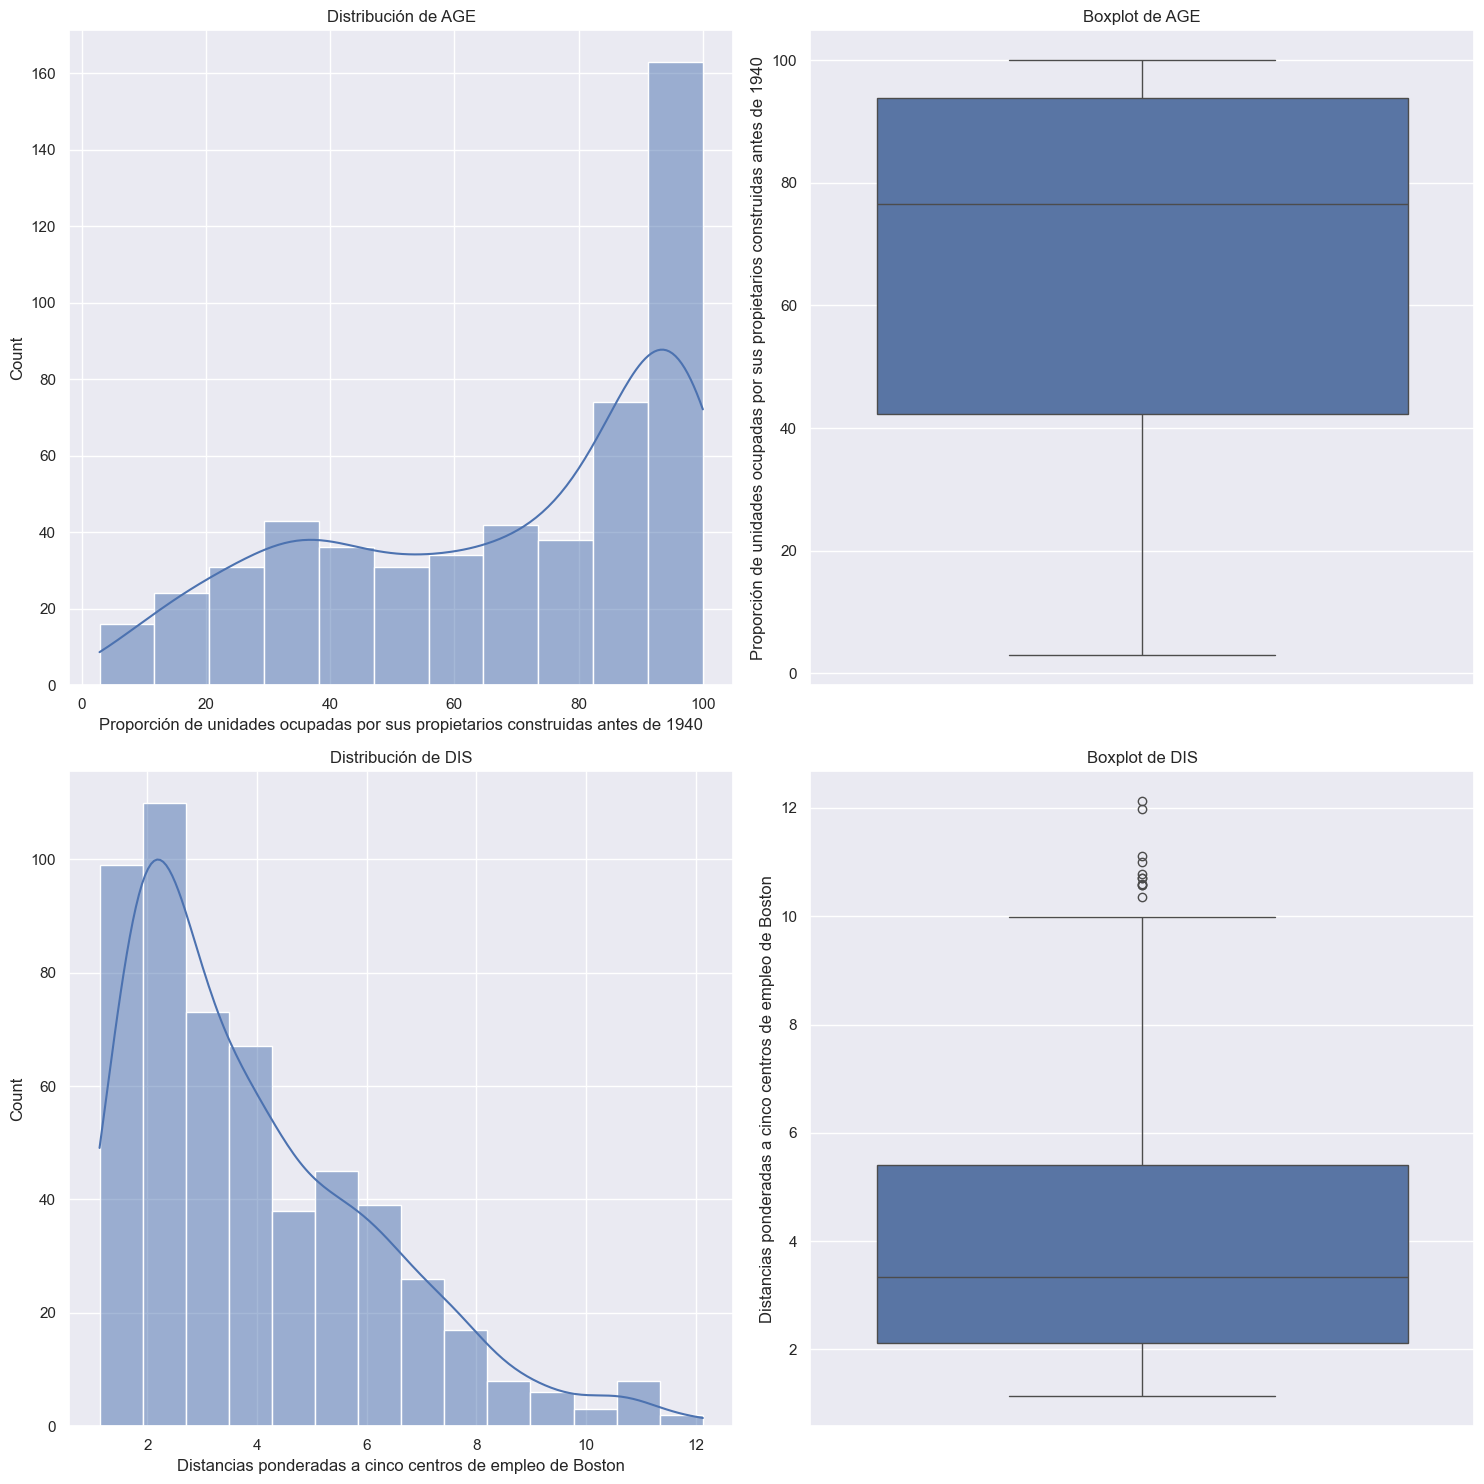

In [575]:
# Crear una figura con 2 filas y 2 columnas
plt.figure(figsize=(15, 15))

# Histograma de AGE
plt.subplot(2, 2, 1)
sns.histplot(df['AGE'], kde=True)
plt.title('Distribución de AGE')
plt.xlabel('Proporción de unidades ocupadas por sus propietarios construidas antes de 1940')

# Boxplot de AGE
plt.subplot(2, 2, 2)
sns.boxplot(y=df['AGE'])
plt.title('Boxplot de AGE')
plt.ylabel('Proporción de unidades ocupadas por sus propietarios construidas antes de 1940')

# Histograma de DIS
plt.subplot(2, 2, 3)
sns.histplot(df['DIS'], kde=True)
plt.title('Distribución de DIS')
plt.xlabel('Distancias ponderadas a cinco centros de empleo de Boston')

# Boxplot de DIS
plt.subplot(2, 2, 4)
sns.boxplot(y=df['DIS'])
plt.title('Boxplot de DIS')
plt.ylabel('Distancias ponderadas a cinco centros de empleo de Boston')

plt.tight_layout()
plt.show()

**AGE:** Tiene una distribución fuertemente sesgada hacia la izquierda, lo que nos lleva a interpretar que una gran proporción de viviendas fueron construidas antes de 1940.

**DIS:** Muestra una distribución sesgada hacia la derecha, con la mayoría de las viviendas cerca de los centros de trabajo.

In [576]:
# 1. Gráfico de dispersión 3D
fig = px.scatter_3d(df, x='AGE', y='DIS', z='MEDV', color='MEDV',
                    title='Relación entre AGE, DIS contra MEDV',
                    labels={'MEDV': 'Valor mediano de las viviendas', 
                            'AGE': 'AGE',
                            'DIS': 'DIS'})
fig.show()

In [577]:
# Imputación con la mediana para AGE
mediana_age = X_train['AGE'].median()
X_train['AGE'] = X_train['AGE'].fillna(mediana_age)
X_test['AGE'] = X_test['AGE'].fillna(mediana_age)

# Imputación con la mediana para DIS
mediana_dis = X_train['DIS'].median()
X_train['DIS'] = X_train['DIS'].fillna(mediana_dis)
X_test['DIS'] = X_test['DIS'].fillna(mediana_dis)

### **RAD:** Indice de accesibilidad a las autopistas radiales y **TAX:** Tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]

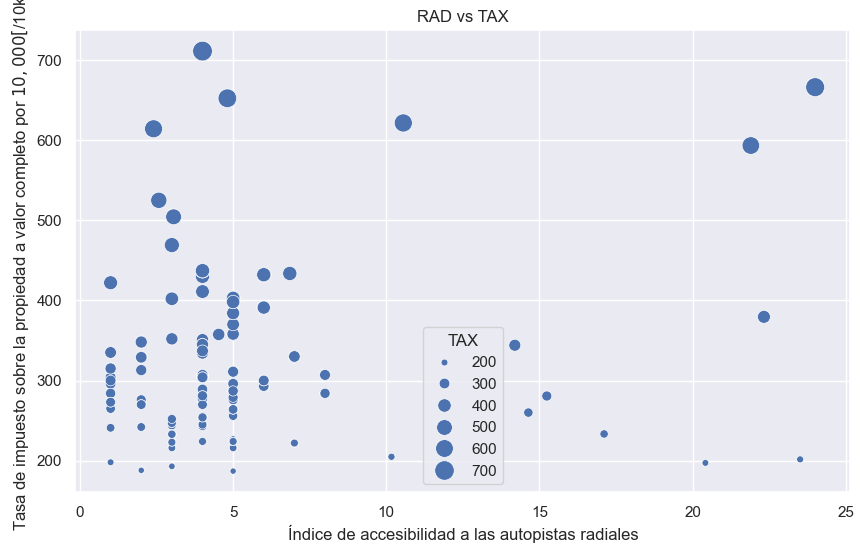

In [578]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAD', y='TAX', size='TAX', sizes=(20, 200))
plt.title('RAD vs TAX')
plt.xlabel('Índice de accesibilidad a las autopistas radiales')
plt.ylabel('Tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]')
plt.show()

Aunque **RAD** y **TAX** tienen una correlación alta de 0.87, el scatterplot no muestra una relación lineal clara. 

**RAD** parece tener valores concentrados en ciertos niveles, lo que dificulta ver una tendencia continua. Además, **TAX** puede estar influenciado por otros factores, lo que explicaría su variación dentro de los mismos valores de RAD. 


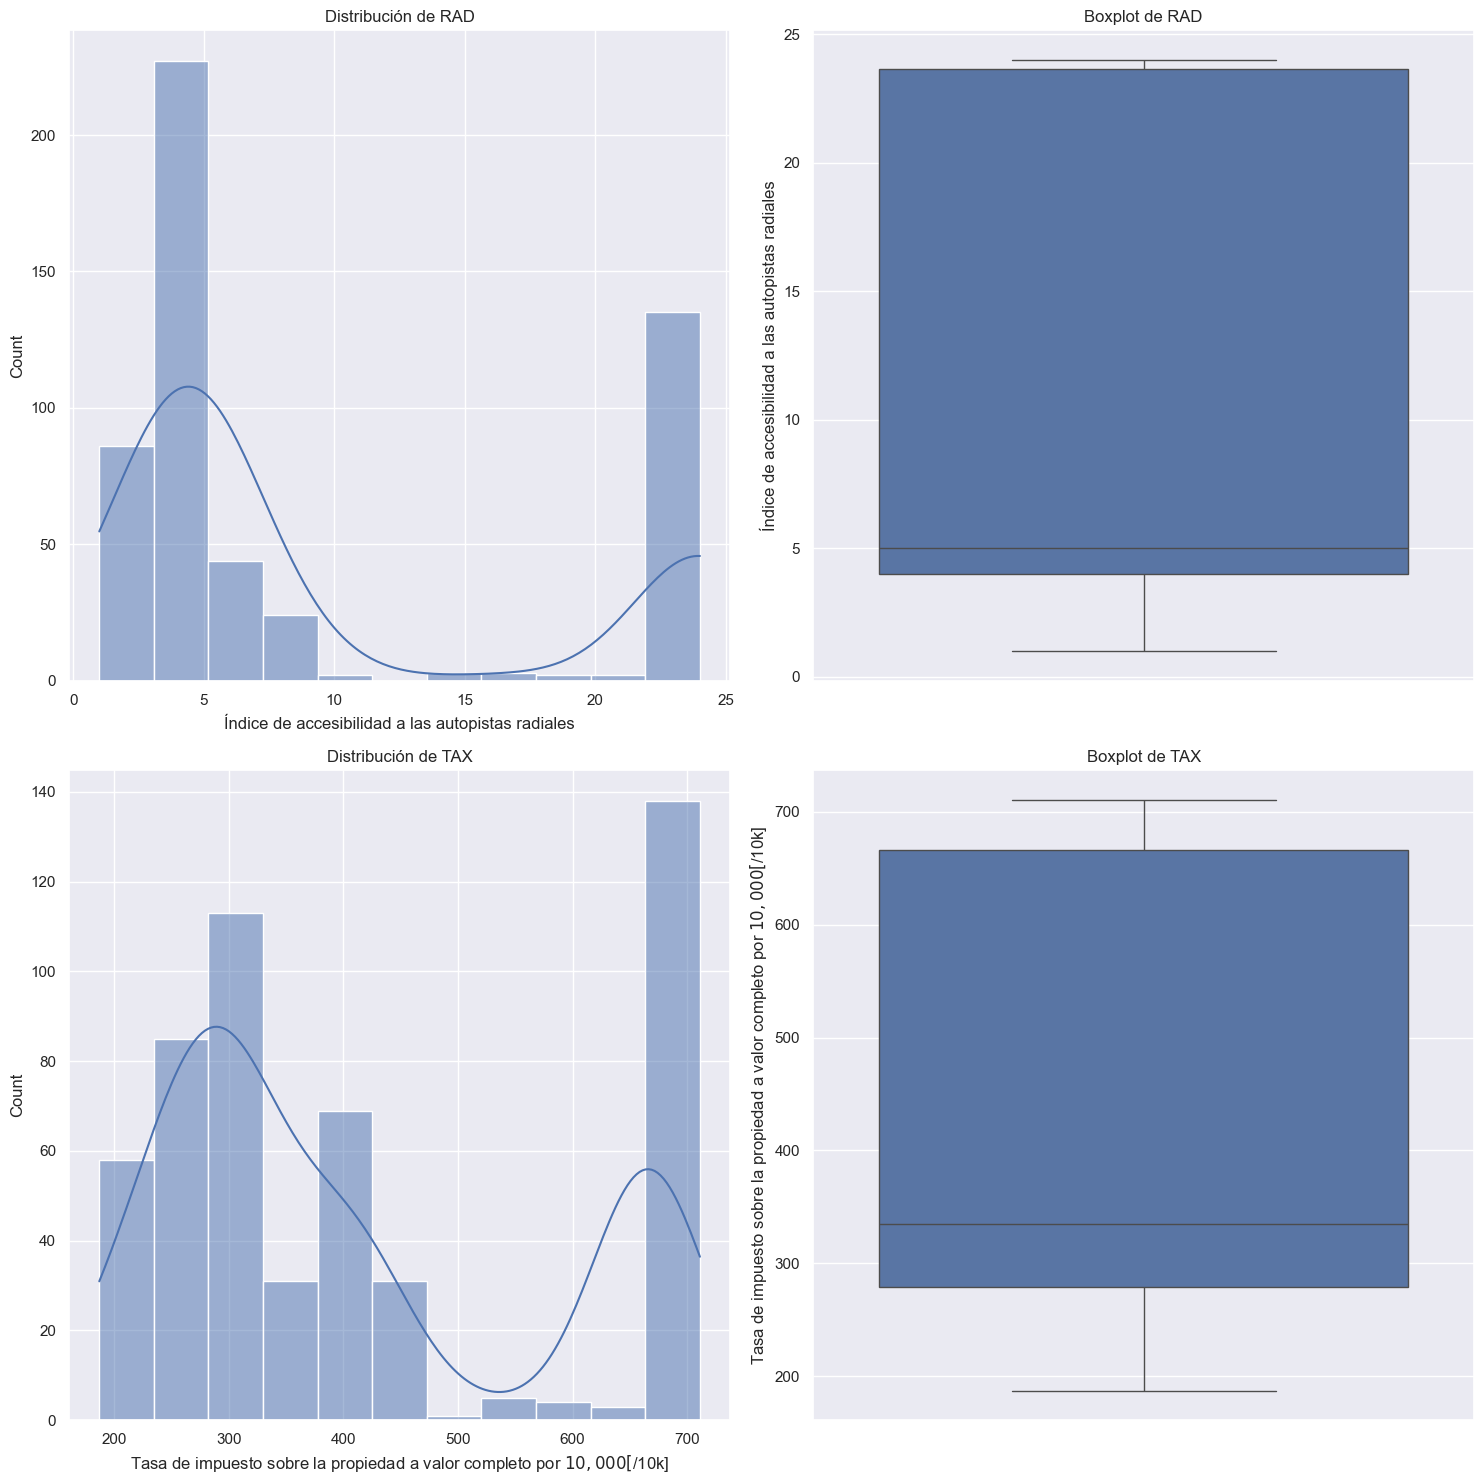

In [579]:
plt.figure(figsize=(15, 15))

# Histograma de AGE
plt.subplot(2, 2, 1)
sns.histplot(df['RAD'], kde=True)
plt.title('Distribución de RAD')
plt.xlabel('Índice de accesibilidad a las autopistas radiales')

# Boxplot de AGE
plt.subplot(2, 2, 2)
sns.boxplot(y=df['RAD'])
plt.title('Boxplot de RAD')
plt.ylabel('Índice de accesibilidad a las autopistas radiales')

# Histograma de DIS
plt.subplot(2, 2, 3)
sns.histplot(df['TAX'], kde=True)
plt.title('Distribución de TAX')
plt.xlabel('Tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]')

# Boxplot de DIS
plt.subplot(2, 2, 4)
sns.boxplot(y=df['TAX'])
plt.title('Boxplot de TAX')
plt.ylabel('Tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]')

plt.tight_layout()
plt.show()

**RAD:** muestra una distribución sesgada hacia la derecha, donde la mayoría de los valores se concentran en niveles bajos, especialmente alrededor de 5. Esto sugiere que la mayoría de las propiedades tienen un acceso limitado a las autopistas.

**TAX:** La mayor parte de los valores estan agrupados alrededor de 300-400 pero tambien se observa un grupo considerable de propiedades con valores en torno a 700. Esto indica que las tasas impositivas son generalmente moderadas, aunque existen algunas zonas con impuestos mas altos.

In [580]:
# 1. Gráfico de dispersión 3D
fig = px.scatter_3d(df, x='RAD', y='TAX', z='MEDV', color='MEDV',
                    title='Relación entre RAD, TAX contra MEDV',
                    labels={'MEDV': 'Valor mediano de las viviendas', 
                            'RAD': 'RAD',
                            'TAX': 'TAX'})
fig.show()

In [581]:
# Calcular la mediana para RAD y TAX en el conjunto de entrenamiento
mediana_rad = X_train['RAD'].median()
mediana_tax = X_train['TAX'].median()

# Imputar los valores nulos en RAD y TAX en X_train
X_train['RAD'] = X_train['RAD'].fillna(mediana_rad)
X_train['TAX'] = X_train['TAX'].fillna(mediana_tax)

# Imputar los valores nulos en RAD y TAX en X_test usando las medianas calculadas en X_train
X_test['RAD'] = X_test['RAD'].fillna(mediana_rad)
X_test['TAX'] = X_test['TAX'].fillna(mediana_tax)

### **PTRATIO:** Proporción alumno-maestro por ciudad

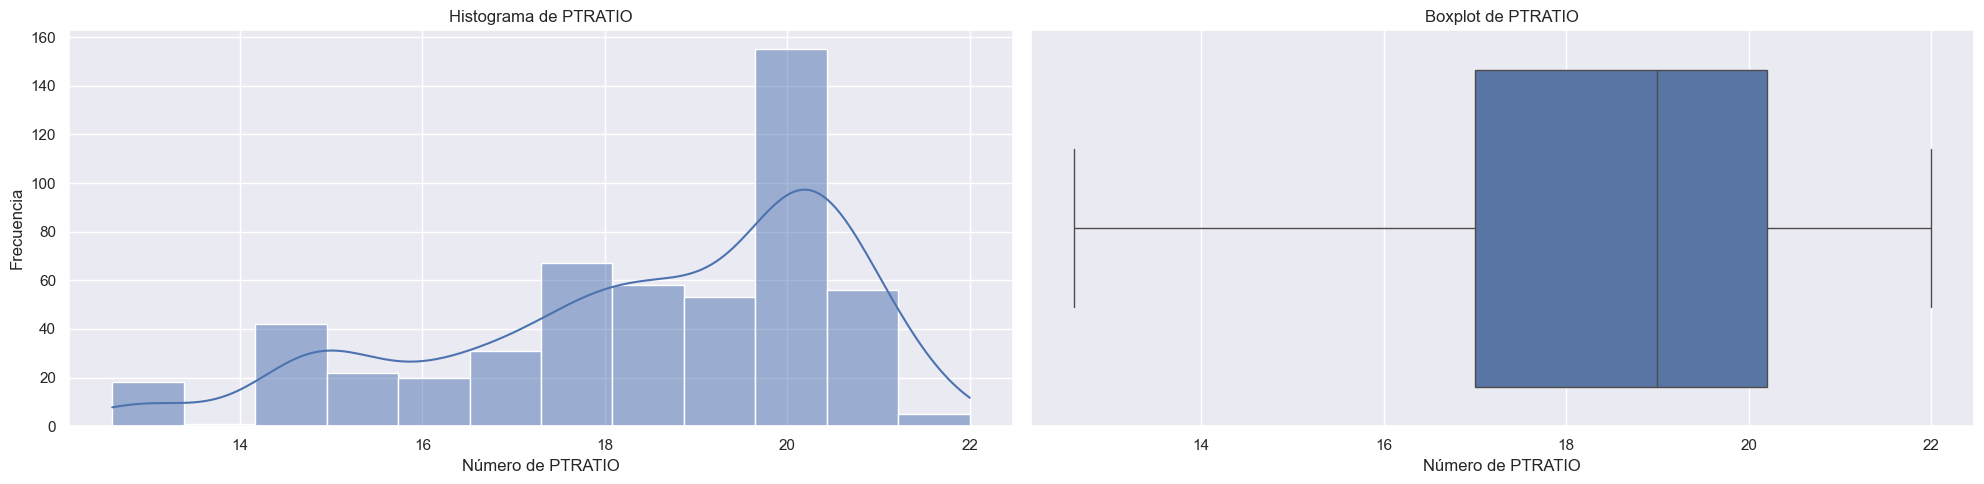

count    528.000000
mean      18.429904
std        2.194759
min       12.600000
25%       17.000000
50%       19.000000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [582]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['PTRATIO'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de PTRATIO')
axs[0].set_xlabel('Número de PTRATIO')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=df['PTRATIO'], ax=axs[1])
axs[1].set_title('Boxplot de PTRATIO')
axs[1].set_xlabel('Número de PTRATIO')

plt.tight_layout()
plt.show()

df['PTRATIO'].describe()

La mayor parte de las ciudades tiene una proporción alumno-maestro que oscila entre 17 y 20, con un pico alrededor de 19-20.

In [583]:
# Calcular la mediana para PTRATIO
mediana_ptratio = X_train['PTRATIO'].median()

# Imputar los valores nulos en PTRATIO en X_train
X_train['PTRATIO'] = X_train['PTRATIO'].fillna(mediana_ptratio)

# Imputar los valores nulos en PTRATIO en X_test usando la mediana calculada en X_train
X_test['PTRATIO'] = X_test['PTRATIO'].fillna(mediana_ptratio)

### **B:** El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

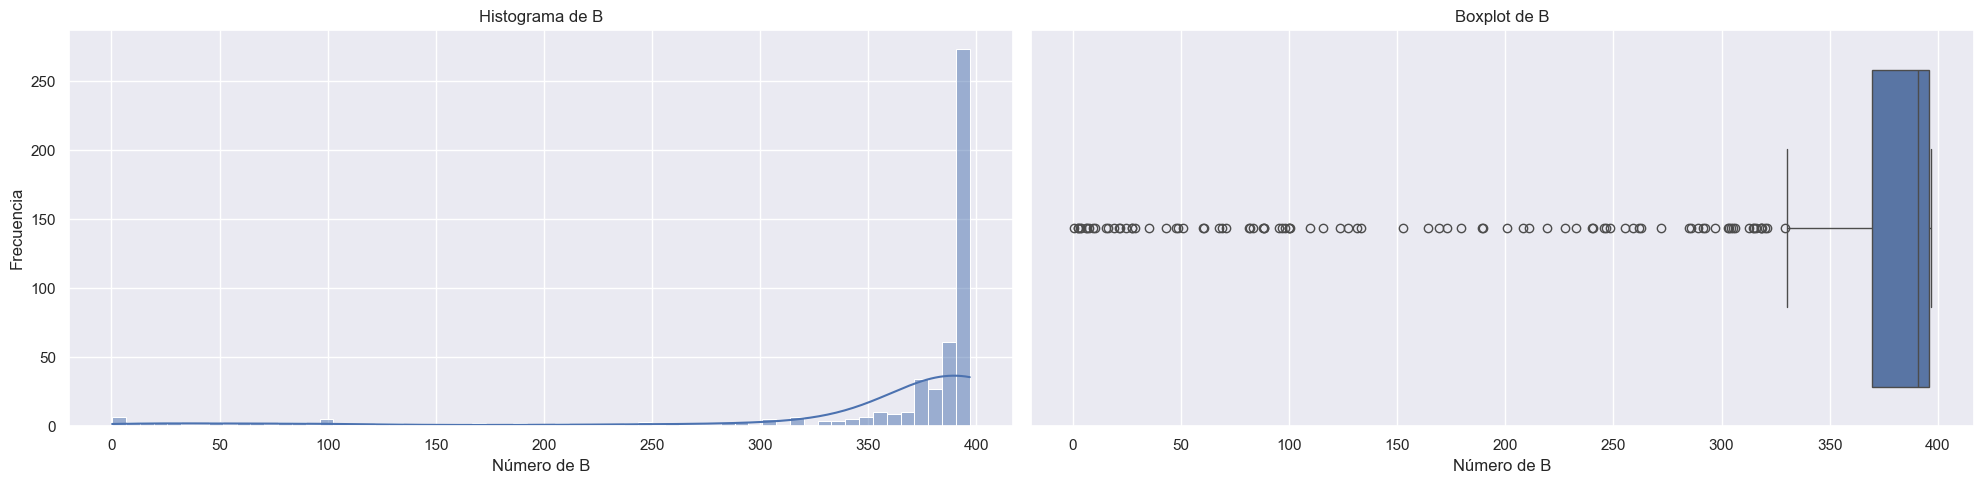

count    534.000000
mean     347.806040
std       99.636208
min        0.320000
25%      369.530000
50%      390.815000
75%      395.890000
max      396.900000
Name: B, dtype: float64

In [584]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['B'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de B')
axs[0].set_xlabel('Número de B')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=df['B'], ax=axs[1])
axs[1].set_title('Boxplot de B')
axs[1].set_xlabel('Número de B')

plt.tight_layout()
plt.show()

df['B'].describe()

**B:** El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

Dado que la distribución es muy asimétrica y está sesgada hacia la izquierda, con una clara concentración de valores cercanos al límite superior, decidimos que el mejor método para imputar los valores faltantes es la **Mediana**. 
Esto ayudará a evitar que los valores extremos más bajos influyan en la imputación.

In [585]:
# Calcular la mediana para la variable B
mediana_b = X_train['B'].median()

# Imputar los valores nulos en B en X_train
X_train['B'] = X_train['B'].fillna(mediana_b)

# Imputar los valores nulos en B en X_test usando la mediana calculada en X_train
X_test['B'] = X_test['B'].fillna(mediana_b)

### **LSTAT:** % de población de menor estatus socioeconómico

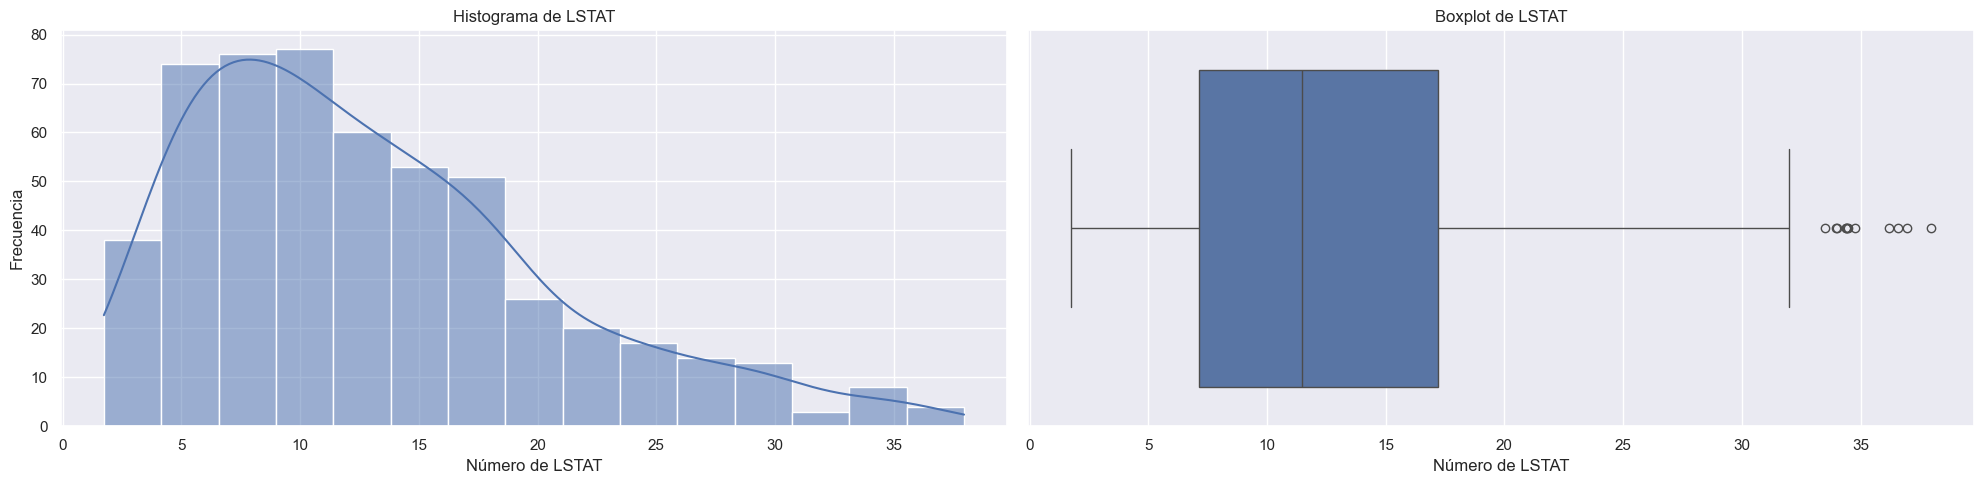

count    534.000000
mean      13.028092
std        7.579972
min        1.730000
25%        7.150000
50%       11.465000
75%       17.205000
max       37.970000
Name: LSTAT, dtype: float64

In [586]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['LSTAT'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de LSTAT')
axs[0].set_xlabel('Número de LSTAT')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=df['LSTAT'], ax=axs[1])
axs[1].set_title('Boxplot de LSTAT')
axs[1].set_xlabel('Número de LSTAT')

plt.tight_layout()
plt.show()

df['LSTAT'].describe()

In [587]:
# Calcular la mediana para la variable LSTAT
mediana_lstat = X_train['LSTAT'].median()

# Imputar los valores nulos en LSTAT en X_train
X_train['LSTAT'] = X_train['LSTAT'].fillna(mediana_lstat)

# Imputar los valores nulos en LSTAT en X_test usando la mediana calculada en X_train
X_test['LSTAT'] = X_test['LSTAT'].fillna(mediana_lstat)

### **MEDV (TARGET):** Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]

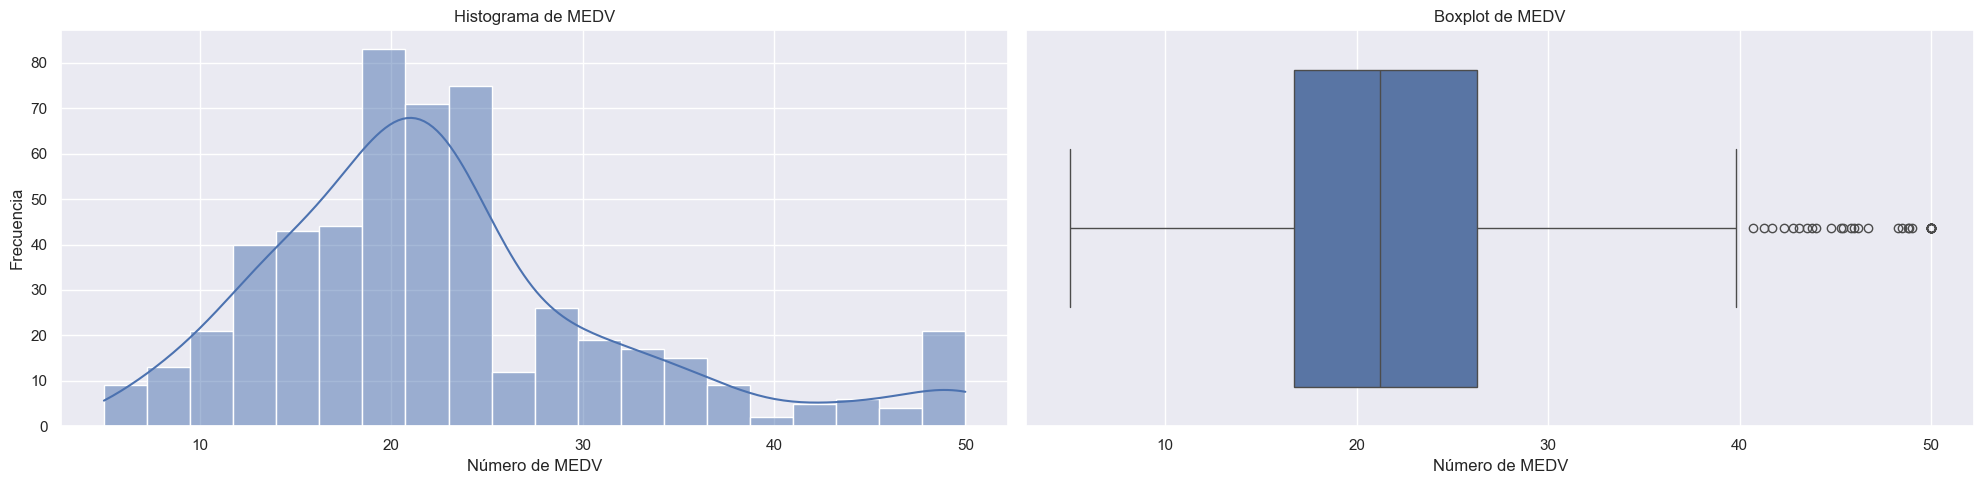

count    535.000000
mean      22.746809
std        9.491452
min        5.000000
25%       16.750000
50%       21.200000
75%       26.300000
max       50.000000
Name: MEDV, dtype: float64

In [588]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['MEDV'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de MEDV')
axs[0].set_xlabel('Número de MEDV')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=df['MEDV'], ax=axs[1])
axs[1].set_title('Boxplot de MEDV')
axs[1].set_xlabel('Número de MEDV')

plt.tight_layout()
plt.show()

df['MEDV'].describe()

In [589]:
y_train

140    24.7
89     19.4
311    20.1
500    30.3
155    21.4
       ... 
71     17.5
106    28.0
271    22.1
436    15.4
102    22.6
Name: MEDV, Length: 444, dtype: float64

In [590]:
# Calcular la mediana para la variable MEDV
mediana_medv = y_train.median()

# Imputar los valores nulos en MEDV en y_train
y_train = y_train.fillna(mediana_medv)

# Imputar los valores nulos en MEDV en y_test usando la mediana calculada en y_train
y_test = y_test.fillna(mediana_medv)

# Estandarización

Estandarizamos las características porque pueden tener diferentes rangos de valores.

Estandarizarlas asegura que todas las características tengan la misma escala, lo que evita que las características
con mayores rangos dominen el modelo. 

In [105]:
scaler = StandardScaler()

### Train

In [106]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))

### Test

In [107]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

# Regresión lineal

`Se intentara predecir la variable MEDV, que representa el Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]`

In [108]:
# INSTANCIAR MODELO
lr_model = LinearRegression(fit_intercept=True)

# ENTRENAR MODELO
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [109]:
# PENDIENTE E INTERCEPTO
lr_model.coef_, lr_model.intercept_

(array([-0.05277504,  1.58727684, -0.23178291, -0.49606439,  2.46081772,
        -1.30004177, -2.67694604,  1.07729787, -1.37999862, -1.49336132,
         0.83768707, -3.03468987,  1.65834804]),
 22.916587341571798)

In [110]:
# PREDICCIONES REGRESIÓN LINEAL
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

In [111]:
X_train 

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
140,0.17505,0.0,5.96,0.499,5.966,30.2,3.8473,5.0,279.0,19.2,393.43,10.13,0.0
89,0.26169,0.0,9.90,0.544,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72,0.0
311,13.07510,0.0,18.10,0.580,5.713,56.7,2.8237,24.0,666.0,20.2,396.90,14.76,0.0
500,0.04666,80.0,1.52,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61,0.0
155,0.11504,0.0,2.89,0.445,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.78420,0.0,8.14,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67,0.0
106,0.04113,25.0,4.86,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29,0.0
271,0.79041,0.0,9.90,0.544,6.122,52.8,2.6403,4.0,304.0,18.4,396.90,5.98,0.0
436,9.96654,0.0,18.10,0.740,6.485,100.0,1.9784,24.0,666.0,20.2,386.73,18.85,0.0


**Para evaluar el desempeño de los modelos se van a seleccionar alguna métricas comunmente utilizadas y que permiten comprender como se ajustan los datos**.

-   R2: coeficiente que determina cuanta varibilidad en los datos es explicada por el modelo.
-   MSE: calcula el promedio de los errores cuadrados, cuanto menor sea mejor será la predicción.
-   RMSE: es la raíz cuadrada del MSE y es una medida más intuitiva, ya que se encuentra en la misma escala que la variable objetivo.
-   MAE: calcula el promedio de los errores absolutos y es más robusto frente a los valores atípicos. Cuanto menor sea mejor será la predicción.

Para una futura comparacion de rendimiento entre modelos vamos a centrarnos pricnipalmente en el Error Cuadratico Medio (MSE) porque penaliza los errores grandes más que los pequeños, ya que eleva los errores al cuadrado, lo que puede ser útil si estás más preocupado por grandes desviaciones.

In [112]:
# Error cuadrático medio
mse_rl = round(mean_squared_error(y_test, y_pred_test),3)
# Raíz del error cuadrático medio
rmse_rl = round(root_mean_squared_error(y_test, y_pred_test),3)
# Error absoluto medio
mae_rl = round(mean_absolute_error(y_test, y_pred_test),3)

# Coeficiente de regresión
r2_test_rl = round(r2_score(y_test, y_pred_test),3)
r2_train_rl = round(r2_score(y_train, y_pred_train),3)

print("-----------------------------------------------------------------------------------------------")
print("Regresion Lineal - Metricas obtenidas")
print("-----------------------------------------------------------------------------------------------")
print("- Error Cuadratico Medio (MSE): ", mse_rl)
print("- Raiz Error Cuadratico Medio (RMSE): ", rmse_rl)
print("- Error Absoluto Medio (MAE): ", mae_rl)
print("- R2 Test: ", r2_test_rl)

-----------------------------------------------------------------------------------------------
Regresion Lineal - Metricas obtenidas
-----------------------------------------------------------------------------------------------
- Error Cuadratico Medio (MSE):  32.143
- Raiz Error Cuadratico Medio (RMSE):  5.669
- Error Absoluto Medio (MAE):  3.82
- R2 Test:  0.67


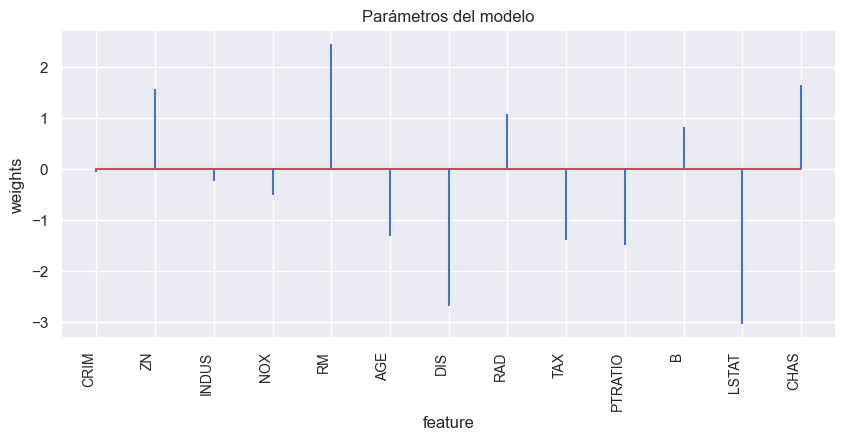

In [113]:
# Coeficientes del modelo

rl_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': lr_model.coef_.flatten()})
# flatten() convierte el array de coeficientes en una versión unidimensional, independientemente de cuántas dimensiones tenga originalmente.
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(rl_coeficientes.predictor, rl_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

- **RM (número promedio de habitaciones por vivienda):** Tiene el coeficiente positivo más alto (positivo), lo que indica que un mayor número de habitaciones está fuertemente asociado con un incremento en la variable objetivo.
- **DIS (distancias ponderadas a cinco centros de empleo de Boston):** Presenta un coeficiente negativo importante, lo que sugiere que cuanto mayor es la distancia a los centros de empleo, menor es el valor de la predicción.
- **LSTAT (% de población de menor estatus socioeconómico):** Con un coeficiente negativo significativo, implica que áreas con una mayor proporción de población de bajo estatus tienden a tener predicciones más bajas.

El gráfico muestra que variables como RM tienen el mayor impacto positivo en el modelo, aumentando el valor de la predicción, mientras que DIS y LSTAT son las que más afectan negativamente. Esto sugiere que la proximidad a centros de empleo y el nivel socioeconómico tienen una influencia crítica en las predicciones del modelo.

## Gradiente Descendiente

In [114]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_val = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    
    o = X_val.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((o, 1)), X_val))
    

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for _ in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W) 
        error_train = y_train - prediction_train  
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_val, W) 
        error_test = y_val - prediction_test 
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de validación')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y validación vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

In [115]:
# FUNCIÓN PARA EL DESCENSO DE GRADIENTE (MINI-BATCH)
def mini_batch_gd(data_train, y_data_train, data_test, y_data_test, random_seed=42, lr=0.01, epochs=100, batch_size=11):

    # Seter random seed
    np.random.seed(random_seed)

    n, m = data_train.shape[0], data_train.shape[1]

    # Poner columna de unos a las matrices X
    data_train = np.hstack((np.ones((n, 1)), data_train))
    data_test = np.hstack((np.ones((data_test.shape[0], 1)), data_test))

    # Inicializar pesos aleatorios
    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []  # Almacenar el error de entrenamiento en cada época
    test_errors = []   # Aalmacenar el error de prueba en cada época

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        data_train = data_train[permutation]
        y_data_train = y_data_train[permutation]

        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = data_train[j:j+batch_size, :]
            y_batch = y_data_train[j:j+batch_size].reshape(-1, 1)

            # Calcular predicción y error de entrenamiento
            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            # Calcular el gradiente y actualizar pesos
            gradient = -2 * np.matmul(x_batch.T, error) / batch_size
            W = W - (lr * gradient)

            # Calcular predicción y error de prueba
            prediction_test = np.matmul(data_test, W)
            error_test = y_data_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(5, 4))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

In [116]:
# FUNCIÓN PARA OBTENER MÉTRICAS
def gd_metrics(test_predict, train_predict, y_test, y_train):
  """
  Función para visualizar métricas como R^2, MSE, RMSE y MAE de los datos.
  Parámetros:
  - train_predict: Predicciones para los datos de entrenamiento.
  - test_predict: Predicciones para los datos de prueba.
  - y_train: Variable objetivo para los datos de entrenamiento.
  - y_test: Variable objetivo para los datos de prueba.
  """
  # Calcular el coeficiente de determinación (R^2) para datos de test
  test_mean = np.mean(y_test)
  ss_total_test = np.sum((y_test - test_mean) ** 2)
  ss_residual_test = np.sum((y_test - test_predict) ** 2)
  test_r2 = round(1 - (ss_residual_test / ss_total_test), 3)

  # Calcular el coeficiente de determinación (R^2) para datos de train
  train_mean = np.mean(y_train)
  ss_total_train = np.sum((y_train - train_mean) ** 2)
  ss_residual_train = np.sum((y_train - train_predict) ** 2)
  train_r2 = round(1 - (ss_residual_train / ss_total_train), 3)

  # Calcular el error cuadrático medio (MSE) para test
  test_mse = round(np.mean((y_test - test_predict) ** 2), 3)

  # Calcular la raíz del error cuadrático medio (RMSE) para test
  test_rmse = round(np.sqrt(np.mean((y_test - test_predict) ** 2)), 3)

  # Calcular el error absoluto medio (MAE) para test
  test_mae = round(np.mean(np.abs(y_test - test_predict)), 3)

  return train_r2, test_r2, test_mse, test_rmse, test_mae

In [117]:
print(X_train_scaled.shape)
print(X_test.shape)

(444, 13)
(111, 13)


In [118]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

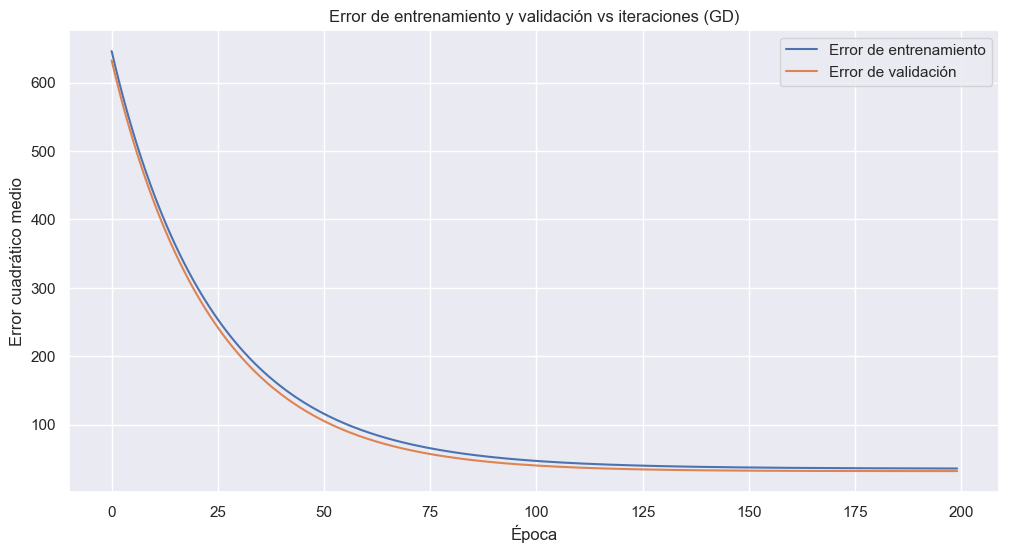

In [119]:
# GRADIENTE DESCENDIENTE
gd = gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, lr=0.01, epochs=200)

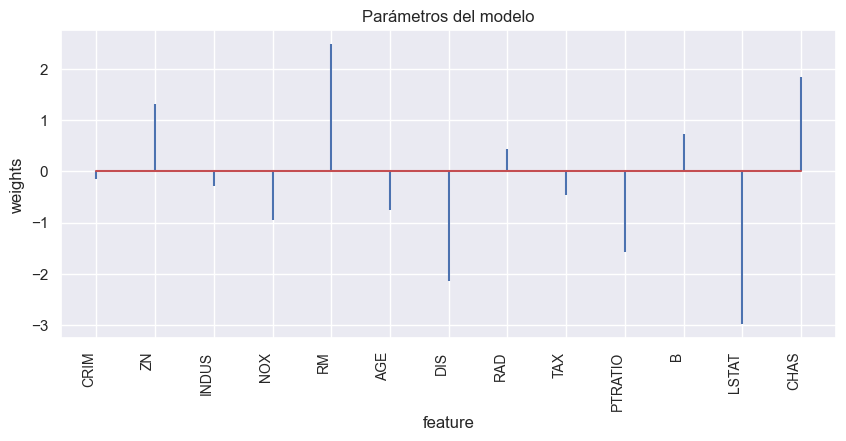

In [120]:
# Coeficientes del modelo

gd_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': gd[1:].flatten()})
# flatten() convierte el array de coeficientes en una versión unidimensional, independientemente de cuántas dimensiones tenga originalmente.
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(gd_coeficientes.predictor, gd_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

In [121]:
# PREDICCIONES GRADINTE DESCENDIENTE
x_test_gd = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))
x_train_gd = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
test_predict_gd = np.matmul(x_test_gd, gd)
train_predict_gd = np.matmul(x_train_gd, gd)

# PREDICCIONES GD
gd_train_r2, gd_test_r2, gd_test_mse, gd_test_rmse, gd_test_mae = gd_metrics(test_predict_gd, train_predict_gd, y_test, y_train)

print("-----------------------------------------------------------------------------------------------")
print("Regresion Lineal Gradiente Descendiente - Metricas obtenidas")
print("-----------------------------------------------------------------------------------------------")
print("- Error Cuadratico Medio (MSE): ", gd_test_mse)
print("- Raiz Error Cuadratico Medio (RMSE): ", gd_test_rmse)
print("- Error Absoluto Medio (MAE): ", gd_test_mae)
print("- R2 Test: ", gd_test_r2)

-----------------------------------------------------------------------------------------------
Regresion Lineal Gradiente Descendiente - Metricas obtenidas
-----------------------------------------------------------------------------------------------
- Error Cuadratico Medio (MSE):  32.061
- Raiz Error Cuadratico Medio (RMSE):  5.662
- Error Absoluto Medio (MAE):  3.738
- R2 Test:  0.671


## Gradiente Descendiente Estocástico

In [122]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

            

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

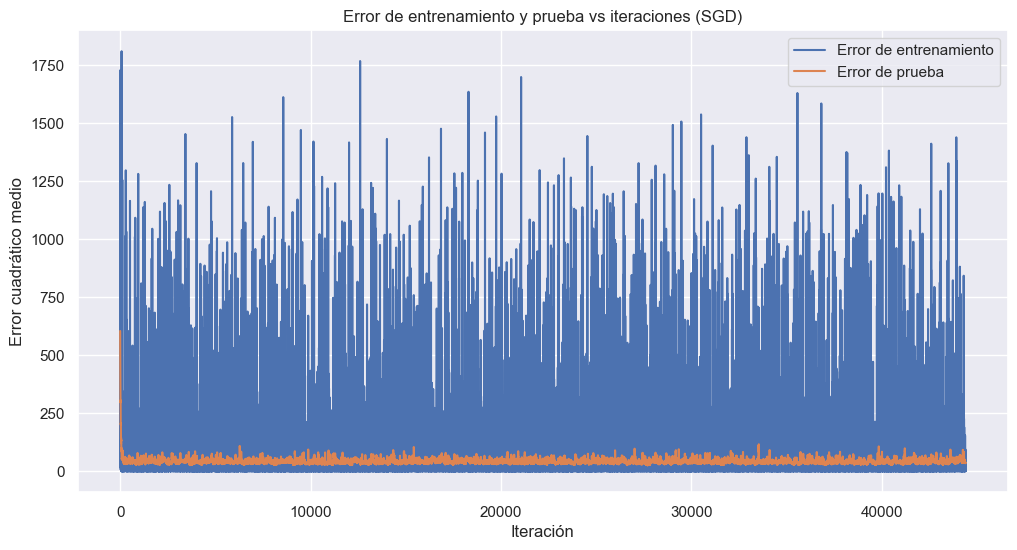

In [123]:
sgd = stochastic_gradient_descent(X_train_scaled, y_train, X_test_scaled  , y_test, lr=0.01, epochs=100)

In [124]:
# PREDICCIONES GRADINTE DESCENDIENTE ESTOCÁSTICO
x_test_sgd = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))
x_train_sgd = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
test_predict_sgd = np.matmul(x_test_sgd, sgd)
train_predict_sgd = np.matmul(x_train_sgd, sgd)

sgd_train_r2, sgd_test_r2, sgd_test_mse, sgd_test_rmse, sgd_test_mae = gd_metrics(test_predict_sgd, train_predict_sgd, y_test, y_train)

print("-----------------------------------------------------------------------------------------------")
print("Regresion Lineal Gradiente Descendiente Estocástico - Metricas obtenidas")
print("-----------------------------------------------------------------------------------------------")
print("- Error Cuadratico Medio (MSE): ", sgd_test_mse)
print("- Raiz Error Cuadratico Medio (RMSE): ", sgd_test_rmse)
print("- Error Absoluto Medio (MAE): ", sgd_test_mae)
print("- R2 Test: ", sgd_test_r2)

-----------------------------------------------------------------------------------------------
Regresion Lineal Gradiente Descendiente Estocástico - Metricas obtenidas
-----------------------------------------------------------------------------------------------
- Error Cuadratico Medio (MSE):  33.429
- Raiz Error Cuadratico Medio (RMSE):  5.782
- Error Absoluto Medio (MAE):  3.877
- R2 Test:  0.657


## Gradiente Descendiente Estocástico Mini-batch

In [125]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

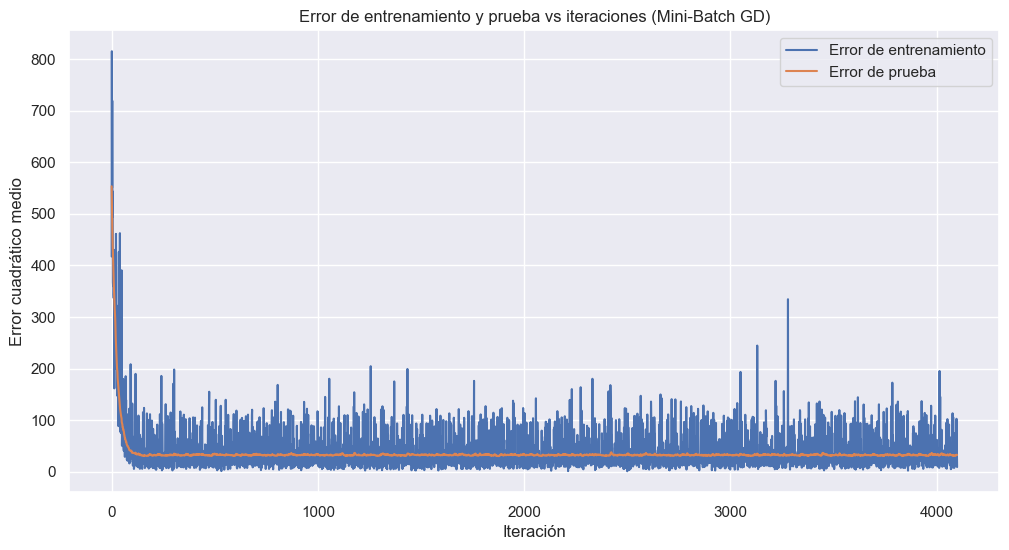

In [126]:
mbsgd = mini_batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, lr=0.01, epochs=100)

In [127]:
# PREDICCIONES GRADINTE DESCENDIENTE ESTOCÁSTICO
x_test_mbsgd = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))
x_train_mbsgd = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
test_predict_mbsgd = np.matmul(x_test_sgd, mbsgd)
train_predict_mbsgd = np.matmul(x_train_sgd, mbsgd)

mbsgd_train_r2, mbsgd_test_r2, mbsgd_test_mse, mbsgd_test_rmse, mbsgd_test_mae = gd_metrics(test_predict_mbsgd, train_predict_mbsgd, y_test, y_train)

print("-----------------------------------------------------------------------------------------------")
print("Regresion Lineal Gradiente Descendiente Estocástico Mini Batch - Metricas obtenidas")
print("-----------------------------------------------------------------------------------------------")
print("- Error Cuadratico Medio (MSE): ", mbsgd_test_mse)
print("- Raiz Error Cuadratico Medio (RMSE): ", mbsgd_test_rmse)
print("- Error Absoluto Medio (MAE): ", mbsgd_test_mae)
print("- R2 Test: ", mbsgd_test_r2)

-----------------------------------------------------------------------------------------------
Regresion Lineal Gradiente Descendiente Estocástico Mini Batch - Metricas obtenidas
-----------------------------------------------------------------------------------------------
- Error Cuadratico Medio (MSE):  32.597
- Raiz Error Cuadratico Medio (RMSE):  5.709
- Error Absoluto Medio (MAE):  3.864
- R2 Test:  0.666


# Regularización

## Ridge

In [128]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.01)

In [129]:
y_pred_ridge = ridge.predict(X_test_scaled)

In [130]:
# Error cuadrático medio
mse_ridge = round(mean_squared_error(y_test, y_pred_ridge),3)
# Raíz del error cuadrático medio
rmse_ridge = round(root_mean_squared_error(y_test, y_pred_ridge),3)
# Error absoluto medio
mae_ridge = round(mean_absolute_error(y_test, y_pred_ridge),3)

# Coeficiente de regresión
r2_test_ridge = ridge.score(X_test_scaled, y_test)
r2_train_ridge = ridge.score(X_train_scaled, y_train)

print("-----------------------------------------------------------------------------------------------")
print("Ridge - Metricas obtenidas")
print("-----------------------------------------------------------------------------------------------")
print("- Error Cuadratico Medio (MSE): ", mse_ridge)
print("- Raiz Error Cuadratico Medio (RMSE): ", rmse_ridge)
print("- Error Absoluto Medio (MAE): ", mae_ridge)
print("- R2 Test: ", r2_test_ridge)

-----------------------------------------------------------------------------------------------
Ridge - Metricas obtenidas
-----------------------------------------------------------------------------------------------
- Error Cuadratico Medio (MSE):  32.143
- Raiz Error Cuadratico Medio (RMSE):  5.669
- Error Absoluto Medio (MAE):  3.82
- R2 Test:  0.6703988944678485


## Lasso

In [131]:
lasso = Lasso(alpha=0.01)  # alpha controla la fuerza de la regularización L1 (Lasso)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [132]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [133]:
# Error cuadrático medio
mse_lasso = round(mean_squared_error(y_test, y_pred_lasso),3)
# Raíz del error cuadrático medio
rmse_lasso = round(root_mean_squared_error(y_test, y_pred_lasso),3)
# Error absoluto medio
mae_lasso = round(mean_absolute_error(y_test, y_pred_lasso),3)

# Coeficiente de regresión
r2_test_lasso = ridge.score(X_test_scaled, y_test)
r2_train_lasso = ridge.score(X_train_scaled, y_train)

print("-----------------------------------------------------------------------------------------------")
print("Lasso - Metricas obtenidas")
print("-----------------------------------------------------------------------------------------------")
print("- Error Cuadratico Medio (MSE): ", mse_lasso)
print("- Raiz Error Cuadratico Medio (RMSE): ", rmse_lasso)
print("- Error Absoluto Medio (MAE): ", mae_lasso)
print("- R2 Test: ", r2_test_lasso)

-----------------------------------------------------------------------------------------------
Lasso - Metricas obtenidas
-----------------------------------------------------------------------------------------------
- Error Cuadratico Medio (MSE):  32.131
- Raiz Error Cuadratico Medio (RMSE):  5.668
- Error Absoluto Medio (MAE):  3.82
- R2 Test:  0.6703988944678485


## Elastic Net

In [134]:
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticnet.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.01)

In [135]:
y_pred_en = lasso.predict(X_test_scaled)

In [136]:
# Error cuadrático medio
mse_en = round(mean_squared_error(y_test, y_pred_en),3)
# Raíz del error cuadrático medio
rmse_en = round(root_mean_squared_error(y_test, y_pred_en),3)
# Error absoluto medio
mae_en = round(mean_absolute_error(y_test, y_pred_en),3)

# Coeficiente de regresión
r2_test_en = ridge.score(X_test_scaled, y_test)
r2_train_en = ridge.score(X_train_scaled, y_train)

print("-----------------------------------------------------------------------------------------------")
print("Elastic Net - Metricas obtenidas")
print("-----------------------------------------------------------------------------------------------")
print("- Error Cuadratico Medio (MSE): ", mse_en)
print("- Raiz Error Cuadratico Medio (RMSE): ", rmse_en)
print("- Error Absoluto Medio (MAE): ", mae_en)
print("- R2 Test: ", r2_test_en)

-----------------------------------------------------------------------------------------------
Elastic Net - Metricas obtenidas
-----------------------------------------------------------------------------------------------
- Error Cuadratico Medio (MSE):  32.131
- Raiz Error Cuadratico Medio (RMSE):  5.668
- Error Absoluto Medio (MAE):  3.82
- R2 Test:  0.6703988944678485


# Optimizacion de Hiperparametros

## Funciones

In [137]:
# FUNCION PARA PROBAR DIFERENTES HIPERPARAMETROS DE GRADIENTE DESCENDIENTE
def probar_hiperparametros_gd(X_train, y_train, X_val, y_val, hp_list):
    """
    Prueba diferentes combinaciones de hiperparámetros (lr y epochs) en el modelo.
    
    Parámetros:
    - X_train, y_train: Datos de entrenamiento
    - X_val, y_val: Datos de validación
    - hp_list: Lista de hiperparámetros, donde cada elemento es un diccionario con 'lr' y 'epochs'
    
    Retorna:
    - Un DataFrame con las métricas de cada combinación de hiperparámetros
    """
    import pandas as pd

    resultados = []

    # Probar cada combinación de hiperparámetros
    for hp in hp_list:
        lr = hp['lr']
        epochs = hp['epochs']
        
        print(f"Probando con lr={lr} y epochs={epochs}...")

        # Entrenar el modelo usando los hiperparámetros actuales
        W = gradient_descent(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

        # Predecir en el conjunto de validación
        X_val_extended = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
        predictions_val = np.matmul(X_val_extended, W)
        mse_val = np.mean((y_val - predictions_val) ** 2)
        mae_val = np.mean(np.abs(y_val - predictions_val))
        r2_val = 1 - (np.sum((y_val - predictions_val) ** 2) / np.sum((y_val - np.mean(y_val)) ** 2))

        # Guardar los resultados
        resultados.append({
            'lr': lr,
            'epochs': epochs,
            'MSE_val': mse_val,
            'MAE_val': mae_val,
            'R2_val': r2_val
        })

    # Convertir resultados a DataFrame para mejor visualización
    resultados_df = pd.DataFrame(resultados)
    return resultados_df

In [138]:
# FUNCION PARA PROBAR DIFERENTES HIPERPARAMETROS DE RIDGE
def probar_hiperparametros_ridge(X_train, y_train, X_val, y_val, hp_list):
    """
    Prueba diferentes combinaciones de hiperparámetros (alpha y max_iter) en el modelo Ridge.
    
    Parámetros:
    - X_train, y_train: Datos de entrenamiento
    - X_val, y_val: Datos de validación
    - hp_list: Lista de hiperparámetros, donde cada elemento es un diccionario con 'alpha' y 'max_iter'
    
    Retorna:
    - Un DataFrame con las métricas de cada combinación de hiperparámetros
    """
    import pandas as pd

    resultados = []

    # Probar cada combinación de hiperparámetros
    for hp in hp_list:
        alpha = hp['alpha']
        max_iter = hp['max_iter']
        
        # Entrenar el modelo Ridge usando los hiperparámetros actuales
        ridge_model = Ridge(alpha=alpha, max_iter=max_iter)
        ridge_model.fit(X_train, y_train)

        # Predecir en el conjunto de validación
        predictions_val = ridge_model.predict(X_val)
        mse_val = np.mean((y_val - predictions_val) ** 2)
        mae_val = np.mean(np.abs(y_val - predictions_val))
        r2_val = ridge_model.score(X_val, y_val)  # R^2 score

        # Guardar los resultados
        resultados.append({
            'alpha': alpha,
            'max_iter': max_iter,
            'MSE_val': mse_val,
            'MAE_val': mae_val,
            'R2_val': r2_val
        })

    # Convertir resultados a DataFrame para mejor visualización
    resultados_df = pd.DataFrame(resultados)
    return resultados_df


In [139]:
# FUNCION PARA PROBAR DIFERENTES HIPERPARAMETROS DE LASSO
from sklearn.linear_model import Lasso

def probar_hiperparametros_lasso(X_train, y_train, X_val, y_val, hp_list):
    """
    Prueba diferentes combinaciones de hiperparámetros (alpha y max_iter) en el modelo Lasso.
    
    Parámetros:
    - X_train, y_train: Datos de entrenamiento
    - X_val, y_val: Datos de validación
    - hp_list: Lista de hiperparámetros, donde cada elemento es un diccionario con 'alpha' y 'max_iter'
    
    Retorna:
    - Un DataFrame con las métricas de cada combinación de hiperparámetros
    """
    import pandas as pd

    resultados = []

    # Probar cada combinación de hiperparámetros
    for hp in hp_list:
        alpha = hp['alpha']
        max_iter = hp['max_iter']
    
        # Entrenar el modelo Lasso usando los hiperparámetros actuales
        lasso_model = Lasso(alpha=alpha, max_iter=max_iter)
        lasso_model.fit(X_train, y_train)

        # Predecir en el conjunto de validación
        predictions_val = lasso_model.predict(X_val)
        mse_val = np.mean((y_val - predictions_val) ** 2)
        mae_val = np.mean(np.abs(y_val - predictions_val))
        r2_val = lasso_model.score(X_val, y_val)  # R^2 score

        # Guardar los resultados
        resultados.append({
            'alpha': alpha,
            'max_iter': max_iter,
            'MSE_val': mse_val,
            'MAE_val': mae_val,
            'R2_val': r2_val
        })

    # Convertir resultados a DataFrame para mejor visualización
    resultados_df = pd.DataFrame(resultados)
    return resultados_df

## Gradiente Descendiente

Probando con lr=0.001 y epochs=200...


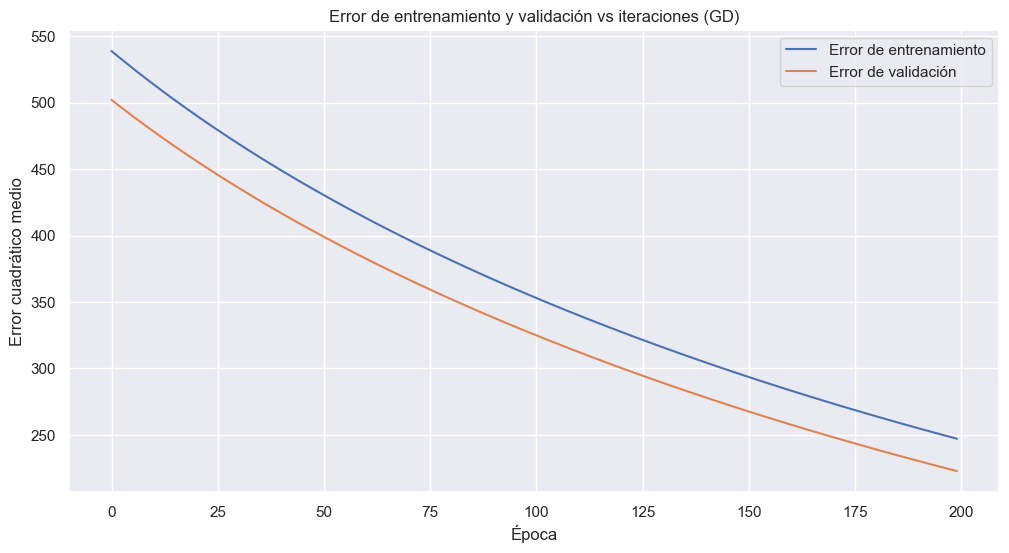

Probando con lr=0.01 y epochs=200...


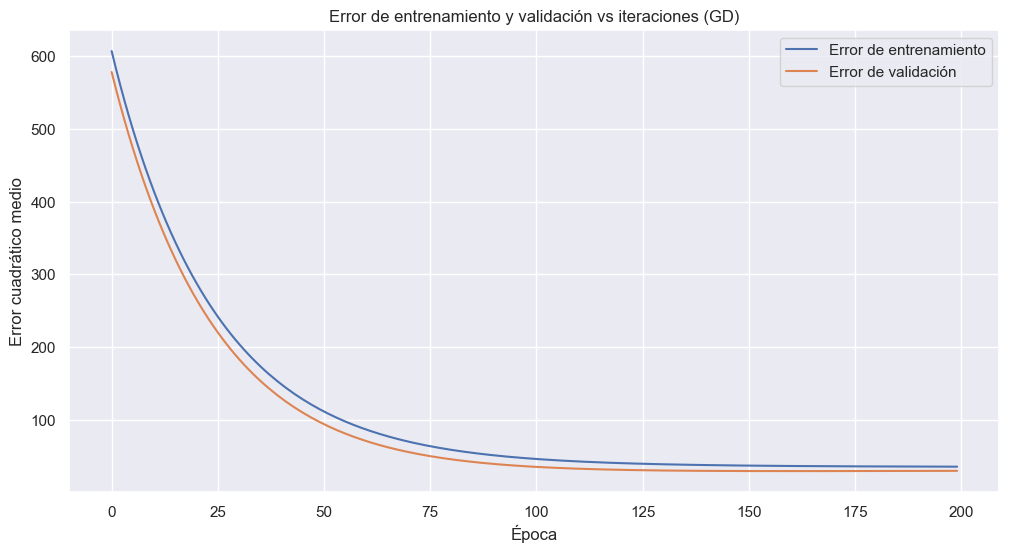

Probando con lr=0.05 y epochs=300...


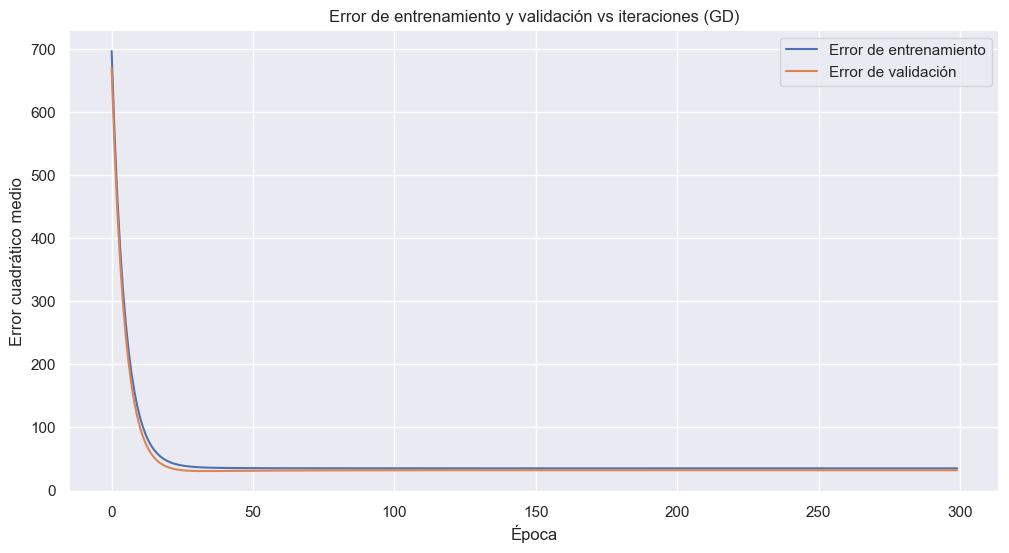

Probando con lr=0.1 y epochs=40...


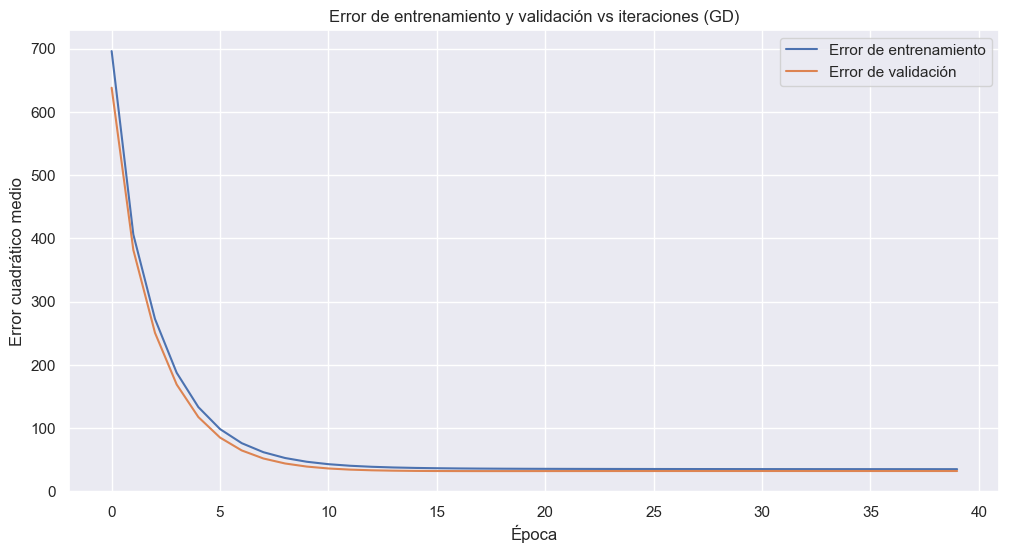

      lr  epochs     MSE_val    MAE_val    R2_val
0  0.001     200  222.003452  12.990620 -1.276474
1  0.010     200   29.975929   3.696507  0.692620
2  0.050     300   32.156732   3.821235  0.670257
3  0.100      40   32.341807   3.836127  0.668360


In [140]:
# Lista de hiperparámetros para probar
gd_hp_list = [
    {'lr': 0.001, 'epochs': 200},
    {'lr': 0.01, 'epochs': 200},
    {'lr': 0.05, 'epochs': 300},
    {'lr': 0.1, 'epochs': 40}
]

# Llamada a la función para testear diferentes hiperparámetros
resultados = probar_hiperparametros_gd(X_train_scaled, y_train, X_test_scaled, y_test, gd_hp_list)

# Mostrar los resultados
print(resultados)

La mejor combinación fue una tasa de aprendizaje de 0.010 y 200 épocas, ya que dio el MSE y MAE más bajos, además de un R² decente que muestra un buen ajuste del modelo.

Con 0.001, el modelo no logró aprender bien, mientras que con tasas más altas como 0.050 y 0.100, no hubo mejoras y el rendimiento fue algo peor.

## Ridge


In [141]:
# Lista de hiperparámetros para probar con Ridge
hp_list_ridge = [
    {'alpha': 0.001, 'max_iter': 500},   # Muy baja regularización, pocas iteraciones
    {'alpha': 0.01,  'max_iter': 1000},  # Baja regularización, número estándar de iteraciones
    {'alpha': 0.1,   'max_iter': 1000},  # Regularización moderada
    {'alpha': 0.5,   'max_iter': 1500},  # Regularización más alta con más iteraciones
    {'alpha': 1.0,   'max_iter': 2000},  # Regularización estándar con mayor número de iteraciones
    {'alpha': 5.0,   'max_iter': 2500},  # Alta regularización, más iteraciones para convergencia
    {'alpha': 10.0,  'max_iter': 3000},  # Regularización alta con muchas iteraciones
    {'alpha': 50.0,  'max_iter': 5000},  # Muy alta regularización con muchas iteraciones
]


# Llamar a la función para Ridge
resultados_ridge = probar_hiperparametros_ridge(X_train_scaled, y_train, X_test_scaled , y_test, hp_list_ridge)
print(resultados_ridge)

    alpha  max_iter    MSE_val   MAE_val    R2_val
0   0.001       500  32.142994  3.819701  0.670398
1   0.010      1000  32.142942  3.819699  0.670399
2   0.100      1000  32.142430  3.819684  0.670404
3   0.500      1500  32.140242  3.819771  0.670427
4   1.000      2000  32.137709  3.819904  0.670453
5   5.000      2500  32.125085  3.824297  0.670582
6  10.000      3000  32.126614  3.832568  0.670566
7  50.000      5000  32.592007  3.914365  0.665794


## Lasso

In [142]:
hp_list_lasso = [
    {'alpha': 0.0001, 'max_iter': 1000},  # Muy baja regularización
    {'alpha': 0.001,  'max_iter': 1500},  # Baja regularización, mayor número de iteraciones
    {'alpha': 0.01,   'max_iter': 2000},  # Regularización moderada, más iteraciones
    {'alpha': 0.05,   'max_iter': 2000},  # Moderada regularización con iteraciones adicionales
    {'alpha': 0.1,    'max_iter': 3000},  # Regularización estándar
    {'alpha': 0.5,    'max_iter': 3000},  # Mayor regularización, más iteraciones
    {'alpha': 1.0,    'max_iter': 4000},  # Alta regularización, muchas iteraciones
    {'alpha': 5.0,    'max_iter': 5000},  # Muy alta regularización con muchas iteraciones
]


# Llamar a la función para Lasso
resultados_lasso = probar_hiperparametros_lasso(X_train_scaled, y_train, X_test_scaled, y_test, hp_list_lasso)
print(resultados_lasso)

    alpha  max_iter     MSE_val   MAE_val    R2_val
0  0.0001      1000  152.538024  9.665044  0.670400
1  0.0010      1500  152.491239  9.663436  0.670411
2  0.0100      2000  152.023664  9.647416  0.670516
3  0.0500      2000  150.012978  9.578115  0.670313
4  0.1000      3000  147.623957  9.493601  0.669310
5  0.5000      3000  134.634479  9.031110  0.646868
6  1.0000      4000  125.323733  8.683616  0.595834
7  5.0000      5000   98.954968  7.495691  0.073634


# Comparacion de modelos

In [143]:
# Definir las variables y métricas a comparar
modelos = ['Regresión Lineal', 'Gradiente Descendiente', 'Gradiente Descendiente Estocastico', 'Gradiente Descendiente Mini Batch', 'Ridge', 'Lasso', 'ElasticNet']
mse_test = [mse_rl, gd_test_mse, sgd_test_mse, mbsgd_test_mse, mse_ridge, mse_lasso, mse_en]
rmse_test = [rmse_rl, gd_test_rmse, sgd_test_rmse, mbsgd_test_rmse, rmse_ridge, rmse_lasso, rmse_en]
mae_test = [mae_rl, gd_test_mae, sgd_test_mae, mbsgd_test_mae, mae_ridge, mae_lasso, mae_en]
r2_test = [r2_test_rl, gd_test_r2, sgd_test_r2, mbsgd_test_r2, r2_test_ridge, r2_test_lasso, r2_test_en]

# Crear el DataFrame
df_comparacion = pd.DataFrame({
    'Modelo': modelos,
    'MSE': mse_test,
    'RMSE': rmse_test,
    'MAE': mae_test,
    'R²': r2_test
})

# Mostrar el DataFrame

df_comparacion

,Modelo,MSE,RMSE,MAE,R²
0,Regresión Lineal,32.143,5.669,3.820,0.670000
1,Gradiente Descendiente,32.061,5.662,3.738,0.671000
2,Gradiente Descendiente Estocastico,33.429,5.782,3.877,0.657000
3,Gradiente Descendiente Mini Batch,32.597,5.709,3.864,0.666000
4,Ridge,32.143,5.669,3.820,0.670399
5,Lasso,32.131,5.668,3.820,0.670399
6,ElasticNet,32.131,5.668,3.820,0.670399


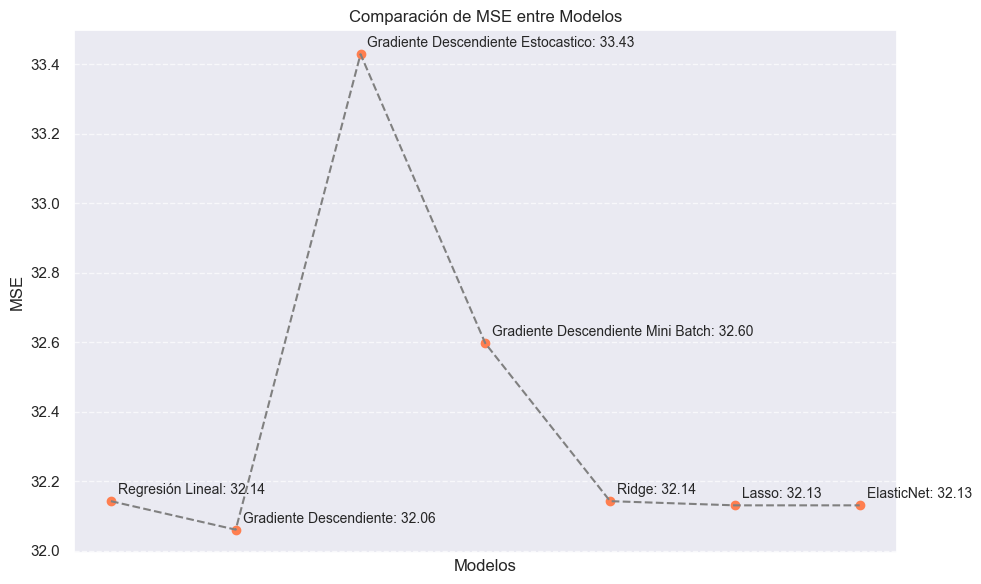

In [144]:
plt.figure(figsize=(10,6))

plt.scatter(df_comparacion['Modelo'], df_comparacion['MSE'], color='coral')

plt.plot(df_comparacion['Modelo'], df_comparacion['MSE'], linestyle='--', color='gray')

for i, txt in enumerate(df_comparacion['MSE']):
    label = f'{df_comparacion["Modelo"][i]}: {txt:.2f}'
    plt.annotate(label, (df_comparacion['Modelo'][i], df_comparacion['MSE'][i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.ylabel('MSE')
plt.xlabel('Modelos')
plt.title('Comparación de MSE entre Modelos')

plt.xticks([])

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Para seleccionar el mejor modelo, nos basamos en la métrica **MSE**, ya que mide el promedio del error cuadrado entre los valores predichos y los valores reales. 

Elegir el modelo con el MSE más bajo es crucial porque minimiza el error global, lo que indica que las predicciones están más cerca de los valores reales. 



## Modelo elegido

Optamos por quedarnos con el modelo de **Gradiente Descendiente** porque presenta el MSE más bajo, lo que significa que sus predicciones son las más precisas en comparación con los otros modelos. Además, su R² de 0.69, uno de los más altos, indica que captura de manera eficiente la varianza de los datos, lo que refuerza su capacidad para ajustarse bien a la realidad.

### Analisis de Residuos

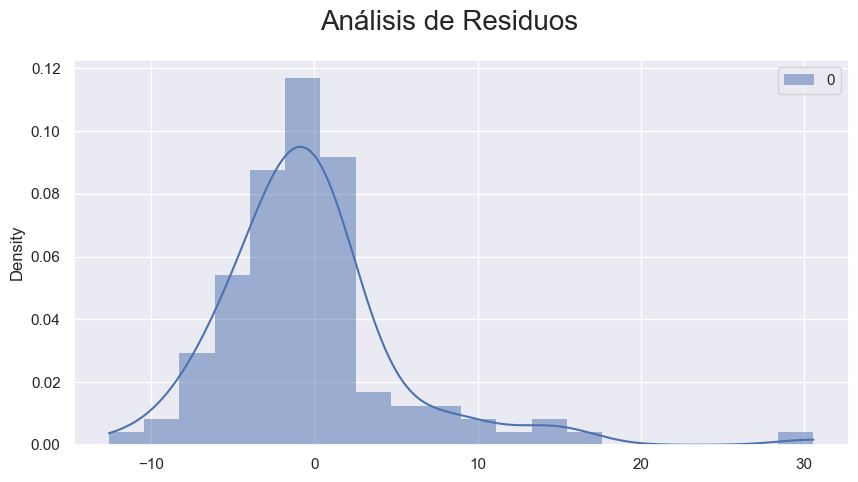

In [145]:
fig = plt.figure(figsize=(10,5))

sns.histplot((y_test - test_predict_gd), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)
plt.show()

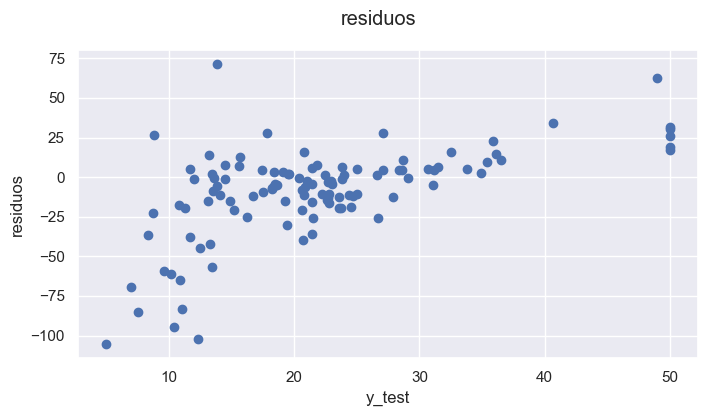

In [146]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,100*(y_test - test_predict_gd)/y_test)
plt.show()